## **UGP_EIS**

### **Authors: Ishan Singh and Nikund Jain**


## **Data Generation**

### **Circuit 1**

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 369 µs (started: 2024-04-19 06:55:47 +00:00)


In [3]:
import numpy as np
import pandas as pd

#Frequency Range
frequencies = np.logspace(-3, 6, 50)
num_params = 10000

time: 419 ms (started: 2024-04-19 06:55:47 +00:00)


In [4]:
def series (R1, R2):
  return R1+R2

def parallel (R1, R2):
  return (R1 * R2)/(R1+R2)

time: 588 µs (started: 2024-04-19 06:55:47 +00:00)


In [5]:
# Circuit 1
import numpy as np
import pandas as pd

# Define the parameter ranges
# num_params = 1000
param_ranges = {
    'R1': np.random.randint(50, 501, num_params),  # Integer values for R1
    'R2': np.random.randint(1000, 1001, num_params),  # Integer values for R2
    'CPE_alpha': np.random.uniform(0.6, 1, num_params) ,  # Float values for CPE_alpha in multiples of 10
     'CPE_Q': np.logspace(-9, -6, num_params) ,  # Float values for CPE_Q in multiples of 10
    # 'Warburg_sigma': np.linspace(0.2, 20, num_params)   # Float values for Warburg_sigma in multiples of 10
    'Warburg_sigma': np.zeros(num_params)   # Float values for Warburg_sigma in multiples of 10
}
ckt = 1

# Initialize lists to store impedance values
impedance_data = []

# Loop through parameter combinations and calculate impedance
for i in range(num_params):

    R1 = param_ranges['R1'][i]
    R2 = param_ranges['R2'][i]
    CPE_alpha = param_ranges['CPE_alpha'][i]
    CPE_Q = param_ranges['CPE_Q'][i]
    Warburg_sigma = 0
    real = []
    imag = []
    for j, freq in enumerate(frequencies):
        omega = 2 * np.pi * freq

        Z_CPE = 1 / (CPE_Q * (1j * omega) ** CPE_alpha)
        Z_Warburg = Warburg_sigma / (1j * omega) ** 0.5
        Z_total = R1 + (((R2) * Z_CPE) / (R2 + Z_CPE))
        real.append(np.real(Z_total))
        imag.append(np.imag(Z_total))
        # impedance_data.append([
        #     freq, np.real(Z_total), np.imag(Z_total),
        #     R1, R2, CPE_alpha, CPE_Q, Warburg_sigma, i+1
        # ])
    impedance_data.append(real+imag+[R1, R2, CPE_alpha, CPE_Q, Warburg_sigma])

# print(len(impedance_data[0]))
cols = []
for i in range(1,51):
  cols.append("X"+str(i))
for i in range(1,51):
  cols.append("Y"+str(i))
# Create a DataFrame from the impedance data
df1 = pd.DataFrame(impedance_data, columns=cols+['R1', 'R2', 'CPE_alpha', 'CPE_Q', 'Warburg_sigma'])
df1['Circuit'] = ckt

# Save the DataFrame to a CSV file
df1.to_csv('Randles_Circuit_Impedance_ckt1.csv', index=False)

time: 5.86 s (started: 2024-04-19 06:55:48 +00:00)


In [6]:
import pandas as pd
train = pd.DataFrame({'id': [1,2,4], 'features': [["A", "B", "C"], ["A", "D", "E"], ["C", "D", "F"]]})
train ['features_t'] = train ["features"].apply (lambda x: " ". join([" ".join(i.split(" ")) for i in x]))

time: 2.74 ms (started: 2024-04-19 06:55:53 +00:00)


In [7]:
train ['features_t']

0    A B C
1    A D E
2    C D F
Name: features_t, dtype: object

time: 4.42 ms (started: 2024-04-19 06:55:53 +00:00)


In [8]:
np.linspace(0.2, 20, 100)

array([ 0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,
        2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,
        4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,
        6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,
        9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11. ,
       11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2,
       13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4,
       15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4, 17.6,
       17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6, 19.8,
       20. ])

time: 4.15 ms (started: 2024-04-19 06:55:53 +00:00)


In [9]:
df1

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y47,Y48,Y49,Y50,R1,R2,CPE_alpha,CPE_Q,Warburg_sigma,Circuit
0,1098.999987,1098.999982,1098.999976,1098.999968,1098.999957,1098.999942,1098.999922,1098.999895,1098.999859,1098.999810,...,-19.690711,-26.248502,-34.898990,-46.234491,99,1000,0.697043,1.000000e-09,0,1
1,1276.999986,1276.999982,1276.999975,1276.999967,1276.999956,1276.999941,1276.999920,1276.999893,1276.999856,1276.999808,...,-18.840865,-25.091086,-33.331578,-44.127859,277,1000,0.694049,1.000691e-09,0,1
2,1197.999997,1197.999995,1197.999993,1197.999990,1197.999986,1197.999980,1197.999971,1197.999958,1197.999940,1197.999915,...,-156.639681,-210.072851,-271.671114,-332.460468,198,1000,0.841653,1.001383e-09,0,1
3,1138.999999,1138.999999,1138.999999,1138.999998,1138.999997,1138.999995,1138.999993,1138.999989,1138.999984,1138.999976,...,-456.263162,-449.359701,-385.142836,-297.134787,139,1000,0.949224,1.002075e-09,0,1
4,1223.999975,1223.999968,1223.999959,1223.999946,1223.999930,1223.999909,1223.999882,1223.999847,1223.999801,1223.999741,...,-6.023832,-7.806113,-10.108130,-13.076208,224,1000,0.618733,1.002767e-09,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1354.989124,1354.985242,1354.979975,1354.972826,1354.963126,1354.949962,1354.932097,1354.907852,1354.874947,1354.830284,...,-27.416033,-20.350323,-15.076267,-11.153318,355,1000,0.721706,9.972404e-07,0,1
9996,1084.993638,1084.991145,1084.987674,1084.982842,1084.976116,1084.966752,1084.953717,1084.935568,1084.910298,1084.875110,...,-12.192559,-8.781570,-6.320248,-4.546448,85,1000,0.781947,9.979296e-07,0,1
9997,1049.995024,1049.992999,1049.990150,1049.986142,1049.980502,1049.972567,1049.961402,1049.945690,1049.923578,1049.892455,...,-8.622156,-6.138468,-4.368175,-3.107396,50,1000,0.807145,9.986193e-07,0,1
9998,1352.998043,1352.997152,1352.995855,1352.993967,1352.991219,1352.987219,1352.981396,1352.972916,1352.960567,1352.942578,...,-2.815669,-1.935249,-1.329990,-0.913966,353,1000,0.887354,9.993094e-07,0,1


time: 29.1 ms (started: 2024-04-19 06:55:53 +00:00)


In [10]:
import matplotlib.pyplot as plt
x_values = df1.loc[:, 'X1':'X50'].values
y_values = df1.loc[:, 'Y1':'Y50'].values

time: 4.85 ms (started: 2024-04-19 06:55:53 +00:00)


### **Circuit 2**

time: 12.2 ms (started: 2024-04-19 06:55:53 +00:00)


In [11]:
# Circuit 2
import numpy as np
import pandas as pd

# Define the parameter ranges
# num_params = 1000
param_ranges = {
    'R1': np.random.randint(50, 501, num_params),  # Integer values for R1
    'R2': np.random.randint(1000, 1001, num_params),  # Integer values for R2
    'CPE_alpha': np.random.uniform(0.6, 1, num_params) ,  # Float values for CPE_alpha in multiples of 10
     'CPE_Q': np.logspace(-9, -6, num_params) ,  # Float values for CPE_Q in multiples of 10
    'Warburg_sigma': np.linspace(0.2, 20, num_params)   # Float values for Warburg_sigma in multiples of 10
}

ckt = 2

# Initialize lists to store impedance values
impedance_data = []

# Loop through parameter combinations and calculate impedance
for i in range(num_params):
    R1 = param_ranges['R1'][i]
    R2 = param_ranges['R2'][i]
    CPE_alpha = param_ranges['CPE_alpha'][i]
    CPE_Q = param_ranges['CPE_Q'][i]
    Warburg_sigma = param_ranges['Warburg_sigma'][i]
    real = []
    imag = []
    for j, freq in enumerate(frequencies):
        omega = 2 * np.pi * freq

        Z_CPE = 1 / (CPE_Q * (1j * omega) ** CPE_alpha)
        Z_Warburg = Warburg_sigma / (1j * omega) ** 0.5
        Z_total = R1 + (((R2 + Z_Warburg) * Z_CPE) / (R2 + Z_Warburg + Z_CPE))
        real.append(np.real(Z_total))
        imag.append(np.imag(Z_total))
        # impedance_data.append([
        #     freq, np.real(Z_total), np.imag(Z_total),
        #     R1, R2, CPE_alpha, CPE_Q, Warburg_sigma, i+1
        # ])
    impedance_data.append(real+imag+[R1, R2, CPE_alpha, CPE_Q, Warburg_sigma])

# print(len(impedance_data[0]))
cols = []
for i in range(1,51):
  cols.append("X"+str(i))
for i in range(1,51):
  cols.append("Y"+str(i))
# Create a DataFrame from the impedance data
df2 = pd.DataFrame(impedance_data, columns=cols+['R1', 'R2', 'CPE_alpha', 'CPE_Q', 'Warburg_sigma'])
df2['Circuit'] = ckt

# Save the DataFrame to a CSV file
df2.to_csv('Randles_Circuit_Impedance_ckt2.csv', index=False)

time: 5.63 s (started: 2024-04-19 06:55:53 +00:00)


In [12]:
df2

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y47,Y48,Y49,Y50,R1,R2,CPE_alpha,CPE_Q,Warburg_sigma,Circuit
0,1454.784120,1454.444065,1454.168823,1453.946041,1453.765719,1453.619763,1453.501623,1453.405995,1453.328585,1453.265918,...,-141.901504,-191.142507,-249.532773,-310.511586,453,1000,0.834359,1.000000e-09,0.200000,2
1,1455.801787,1455.458366,1455.180400,1454.955414,1454.773309,1454.625912,1454.506607,1454.410038,1454.331871,1454.268596,...,-344.562174,-408.902704,-432.705064,-403.461290,454,1000,0.908413,1.000691e-09,0.201980,2
2,1390.819451,1390.472663,1390.191971,1389.964779,1389.780888,1389.632044,1389.511568,1389.414050,1389.335113,1389.271213,...,-252.371699,-323.335673,-384.284700,-412.848098,389,1000,0.879420,1.001383e-09,0.203960,2
3,1059.837115,1059.486960,1059.203543,1058.974144,1058.788467,1058.638178,1058.516531,1058.418065,1058.338360,1058.273837,...,-208.686498,-274.034200,-340.105851,-389.187016,58,1000,0.863773,1.002075e-09,0.205941,2
4,1495.854782,1495.501261,1495.215120,1494.983518,1494.796059,1494.644329,1494.521518,1494.422114,1494.341654,1494.276528,...,-472.627126,-417.130692,-325.643827,-235.231898,494,1000,0.969237,1.002767e-09,0.207921,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1415.310414,1381.312565,1353.791787,1331.512649,1313.474897,1298.868531,1287.037410,1277.449747,1269.674176,1263.360290,...,-43.951606,-33.330328,-25.189489,-18.989221,237,1000,0.685196,9.972404e-07,19.992079,2
9996,1599.325765,1565.324225,1537.800317,1515.518471,1497.478317,1482.869752,1471.036549,1461.446849,1453.669223,1447.353220,...,-50.231927,-38.360830,-29.177831,-22.127409,421,1000,0.674493,9.979296e-07,19.994059,2
9997,1653.367834,1619.367063,1591.845728,1569.568450,1551.535155,1536.936152,1525.115755,1515.542786,1507.786648,1501.497860,...,-4.334213,-3.018773,-2.102174,-1.463695,475,1000,0.856664,9.986193e-07,19.996040,2
9998,1531.388892,1497.385525,1469.862501,1447.584417,1429.551236,1414.953380,1403.135364,1393.566322,1385.816118,1379.535933,...,-1.952169,-1.326919,-0.901877,-0.612962,353,1000,0.913296,9.993094e-07,19.998020,2


time: 28.4 ms (started: 2024-04-19 06:55:59 +00:00)


In [13]:
import numpy as np
import pandas as pd


df_abs_pct_change=pd.DataFrame()
for col in df1.columns:
    df_abs_pct_change[col] = abs((df2[col]-df1[col])/df1[col])

time: 89.3 ms (started: 2024-04-19 06:55:59 +00:00)


<ipython-input-13-67d45d8fb95f>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col]-df1[col])/df1[col])
<ipython-input-13-67d45d8fb95f>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col]-df1[col])/df1[col])
<ipython-input-13-67d45d8fb95f>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

In [14]:
df_abs_pct_change

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y47,Y48,Y49,Y50,R1,R2,CPE_alpha,CPE_Q,Warburg_sigma,Circuit
0,0.323734,0.323425,0.323175,0.322972,0.322808,0.322675,0.322568,0.322481,0.322410,0.322353,...,6.206520,6.282035,6.150143,5.716016,3.575758,0.0,0.196997,0.0,inf,1.0
1,0.140017,0.139748,0.139530,0.139354,0.139212,0.139096,0.139003,0.138927,0.138866,0.138817,...,17.288023,15.296732,11.981835,8.143006,0.638989,0.0,0.308860,0.0,inf,1.0
2,0.160951,0.160662,0.160427,0.160238,0.160084,0.159960,0.159859,0.159778,0.159712,0.159659,...,0.611161,0.539160,0.414522,0.241796,0.964646,0.0,0.044872,0.0,inf,1.0
3,0.069502,0.069810,0.070058,0.070260,0.070423,0.070555,0.070662,0.070748,0.070818,0.070875,...,0.542618,0.390167,0.116936,0.309800,0.582734,0.0,0.090022,0.0,inf,1.0
4,0.222104,0.221815,0.221581,0.221392,0.221239,0.221115,0.221014,0.220933,0.220868,0.220814,...,77.459548,52.436412,31.216030,16.989306,1.205357,0.0,0.566487,0.0,inf,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.044518,0.019430,0.000877,0.017314,0.030619,0.041390,0.050109,0.057169,0.062885,0.067514,...,0.603135,0.637828,0.670804,0.702562,0.332394,0.0,0.050590,0.0,inf,1.0
9996,0.474042,0.442707,0.417344,0.396813,0.380195,0.366742,0.355852,0.347036,0.339898,0.334120,...,3.119884,3.368334,3.616564,3.866966,3.952941,0.0,0.137419,0.0,inf,1.0
9997,0.574643,0.542265,0.516058,0.494847,0.477680,0.463787,0.452545,0.443449,0.436092,0.430144,...,0.497317,0.508220,0.518752,0.528964,8.500000,0.0,0.061351,0.0,inf,1.0
9998,0.131849,0.106717,0.086376,0.069912,0.056586,0.045800,0.037069,0.030003,0.024284,0.019656,...,0.306677,0.314342,0.321892,0.329338,0.000000,0.0,0.029235,0.0,inf,1.0


time: 31.1 ms (started: 2024-04-19 06:55:59 +00:00)


DF1 and DF2

In [15]:
# Initialize an empty list to store counts for each row
counts_per_row = []

# Iterate over each row in df_abs_pct_change
for index, row in df_abs_pct_change.iterrows():
    # Initialize counter for current row
    count_x_less_than_0_03 = 0

    # Iterate over each x-coordinate column (X1 to X50)
    for i in range(1, 51):
        # Check if the value of the x-coordinate is less than 0.03
        if row[f'X{i}'] < 0.03:
            count_x_less_than_0_03 += 1
        else:
            # If x-coordinate is greater than 0.03, check the corresponding y-coordinate (Y1 to Y50)
            if row[f'Y{i}'] < 0.03:
                count_x_less_than_0_03 += 1

    # Append the count for the current row to the list
    counts_per_row.append(count_x_less_than_0_03)

# Add the counts as a new column to df_abs_pct_change
print(counts_per_row)

# Display the resulting DataFrame
# print(df_abs_pct_change)


[0, 1, 1, 3, 0, 0, 2, 0, 0, 0, 0, 0, 49, 1, 44, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 42, 1, 3, 0, 1, 3, 4, 50, 0, 0, 0, 1, 0, 7, 43, 42, 1, 0, 0, 0, 0, 42, 0, 44, 0, 0, 0, 1, 0, 1, 14, 41, 45, 50, 0, 1, 0, 0, 0, 0, 43, 1, 0, 2, 0, 46, 0, 50, 0, 1, 50, 0, 0, 50, 0, 2, 0, 1, 0, 0, 0, 46, 1, 0, 1, 0, 40, 0, 0, 0, 0, 0, 1, 45, 0, 0, 50, 0, 0, 1, 0, 41, 0, 0, 1, 2, 0, 0, 44, 0, 0, 0, 1, 0, 4, 0, 1, 0, 3, 3, 1, 0, 1, 0, 2, 50, 1, 3, 4, 0, 5, 1, 0, 1, 2, 0, 0, 1, 41, 2, 0, 0, 0, 44, 2, 0, 0, 0, 0, 1, 0, 3, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 41, 42, 0, 1, 0, 0, 2, 4, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 22, 9, 20, 42, 0, 1, 2, 0, 0, 0, 0, 0, 0, 41, 2, 0, 4, 0, 4, 2, 0, 1, 1, 0, 0, 50, 0, 1, 0, 45, 0, 0, 2, 0, 1, 0, 41, 41, 1, 0, 42, 1, 0, 1, 0, 2, 1, 1, 0, 5, 0, 0, 0, 3, 49, 1, 0, 0, 40, 0, 3, 1, 1, 0, 0, 1, 43, 1, 0, 1, 1, 0, 1, 0, 42, 0, 0, 0, 0, 0, 4, 1, 1, 0, 0, 0, 40, 1, 0, 50, 0, 3, 0, 0, 0, 46, 45, 0, 1, 42, 0, 0, 0, 3, 0, 43, 1, 48, 1, 0, 1, 1, 44, 1, 0, 0, 3, 1, 0, 1, 0, 0, 42, 7, 1, 43, 

### **Circuit 3**



time: 4.13 s (started: 2024-04-19 06:55:59 +00:00)


In [16]:
# Circuit 3
import numpy as np
import pandas as pd

# Define the parameter ranges
# num_params = 1000
param_ranges = {
    'R1': np.random.randint(50, 501, num_params),  # Integer values for R1
    'R2': np.random.randint(1000, 10001, num_params),  # Integer values for R2
    'CPE_alpha': np.random.uniform(0.6, 1, num_params) ,  # Float values for CPE_alpha in multiples of 10
 'CPE_Q': np.logspace(-9, -6, num_params) ,  # Float values for CPE_Q in multiples of 10
    'Warburg_sigma': np.linspace(0.2, 20, num_params)   # Float values for Warburg_sigma in multiples of 10
}

ckt = 3

# Initialize lists to store impedance values
impedance_data = []

# Loop through parameter combinations and calculate impedance
for i in range(num_params):
    R1 = param_ranges['R1'][i]
    R2 = param_ranges['R2'][i]
    CPE_alpha = param_ranges['CPE_alpha'][i]
    CPE_Q = param_ranges['CPE_Q'][i]
    Warburg_sigma = param_ranges['Warburg_sigma'][i]
    real = []
    imag = []
    for j, freq in enumerate(frequencies):
        omega = 2 * np.pi * freq

        Z_CPE = 1 / (CPE_Q * (1j * omega) ** CPE_alpha)
        Z_Warburg = Warburg_sigma / (1j * omega) ** 0.5
        Z_total = R1 + (((R2 + Z_Warburg) * Z_CPE) / (R2 + Z_Warburg + Z_CPE)) + ((R2 * Z_CPE) / (R2 + Z_CPE))
        real.append(np.real(Z_total))
        imag.append(np.imag(Z_total))
        # impedance_data.append([
        #     freq, np.real(Z_total), np.imag(Z_total),
        #     R1, R2, CPE_alpha, CPE_Q, Warburg_sigma, i+1
        # ])
    impedance_data.append(real+imag+[R1, R2, CPE_alpha, CPE_Q, Warburg_sigma])

cols = []
for i in range(1,51):
  cols.append("X"+str(i))
for i in range(1,51):
  cols.append("Y"+str(i))
# Create a DataFrame from the impedance data
df3 = pd.DataFrame(impedance_data, columns=cols+['R1', 'R2', 'CPE_alpha', 'CPE_Q', 'Warburg_sigma'])
df3['Circuit'] = ckt

# Save the DataFrame to a CSV file
df3.to_csv('Randles_Circuit_Impedance_ckt3.csv', index=False)

time: 5.8 s (started: 2024-04-19 06:56:03 +00:00)


In [17]:
df3

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y47,Y48,Y49,Y50,R1,R2,CPE_alpha,CPE_Q,Warburg_sigma,Circuit
0,9700.784071,9700.443992,9700.168716,9699.945882,9699.765484,9699.619417,9699.501111,9699.405238,9699.327467,9699.264266,...,-2895.283575,-2163.078818,-1548.923024,-1083.062707,379,4660,0.918348,1.000000e-09,0.200000,3
1,3039.801692,3039.458243,3039.180242,3038.955210,3038.773047,3038.625574,3038.506172,3038.409479,3038.331152,3038.267672,...,-18.015262,-23.221397,-29.907101,-38.476081,354,1342,0.606937,1.000691e-09,0.201980,3
2,10857.818309,10857.471164,10857.190004,10856.962198,10856.777502,10856.627603,10856.505741,10856.406405,10856.325084,10856.258057,...,-463.765657,-597.164047,-764.155928,-969.749548,282,5287,0.642918,1.001383e-09,0.203960,3
3,8304.837063,8304.486883,8304.203432,8303.973982,8303.788230,8303.637832,8303.516025,8303.417326,8303.337281,8303.272262,...,-3086.050374,-2579.170645,-1994.502381,-1467.421362,451,3926,0.894443,1.002075e-09,0.205941,3
4,8935.854584,8935.500983,8935.214729,8934.982968,8934.795286,8934.643242,8934.519991,8934.419966,8934.338636,8934.272284,...,-2683.254921,-3074.372318,-3249.661523,-3144.794183,74,4430,0.806284,1.002767e-09,0.207921,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,14784.547880,14750.268635,14722.359712,14699.544675,14680.766408,14665.136009,14651.887758,14640.337503,14629.841673,14619.753699,...,-29.292644,-21.166900,-15.293372,-11.048703,361,7123,0.769248,9.972404e-07,19.992079,3
9996,9156.289552,9122.266509,9094.710784,9072.381814,9054.271809,9039.559652,9027.572732,9017.754775,9009.637869,9002.816815,...,-3.939486,-2.677943,-1.820361,-1.237400,150,4414,0.912791,9.979296e-07,19.994059,3
9997,6662.352936,6628.345502,6600.814463,6578.522981,6560.468801,6545.838973,6533.972918,6524.332089,6516.474740,6510.034425,...,-2.451535,-1.643120,-1.101279,-0.738113,222,3131,0.946127,9.986193e-07,19.996040,3
9998,6835.332119,6801.306608,6773.752031,6751.428843,6733.331013,6718.640275,6706.688537,6696.926623,6688.897737,6682.214145,...,-6.343726,-4.374779,-3.016838,-2.080352,167,3245,0.878947,9.993094e-07,19.998020,3


time: 28.6 ms (started: 2024-04-19 06:56:09 +00:00)


### **Circuit 4**

In [18]:
# Circuit 4
import numpy as np
import pandas as pd

# Define the parameter ranges
# num_params = 1000
param_ranges = {
    'R1': np.random.randint(50, 501, num_params),  # Integer values for R1
    'R2': np.random.randint(1000, 10001, num_params),  # Integer values for R2
    'CPE_alpha': np.random.uniform(0.6, 1, num_params) ,  # Float values for CPE_alpha in multiples of 10
 'CPE_Q': np.logspace(-9, -6, num_params) ,  # Float values for CPE_Q in multiples of 10
    'Warburg_sigma': np.linspace(0.2, 20, num_params)   # Float values for Warburg_sigma in multiples of 10
}

ckt = 4

# Initialize lists to store impedance values
impedance_data = []

# Loop through parameter combinations and calculate impedance
for i in range(num_params):
    R1 = param_ranges['R1'][i]
    R2 = param_ranges['R2'][i]
    CPE_alpha = param_ranges['CPE_alpha'][i]
    CPE_Q = param_ranges['CPE_Q'][i]
    Warburg_sigma = param_ranges['Warburg_sigma'][i]
    real = []
    imag = []
    for j, freq in enumerate(frequencies):
        omega = 2 * np.pi * freq

        Z_CPE = 1 / (CPE_Q * (1j * omega) ** CPE_alpha)
        Z_Warburg = Warburg_sigma / (1j * omega) ** 0.5
        Z_partial  = parallel(Z_CPE, series(R2, Z_Warburg))
        Z_total = series (R1, parallel(Z_CPE, series(R2, Z_partial)))
        real.append(np.real(Z_total))
        imag.append(np.imag(Z_total))
        # impedance_data.append([
        #     freq, np.real(Z_total), np.imag(Z_total),
        #     R1, R2, CPE_alpha, CPE_Q, Warburg_sigma, i+1
        # ])
    impedance_data.append(real+imag+[R1, R2, CPE_alpha, CPE_Q, Warburg_sigma])

cols = []
for i in range(1,51):
  cols.append("X"+str(i))
for i in range(1,51):
  cols.append("Y"+str(i))
# Create a DataFrame from the impedance data
df4 = pd.DataFrame(impedance_data, columns=cols+['R1', 'R2', 'CPE_alpha', 'CPE_Q', 'Warburg_sigma'])
df4['Circuit'] = ckt

# Save the DataFrame to a CSV file
df4.to_csv('Randles_Circuit_Impedance_ckt4.csv', index=False)

time: 6.9 s (started: 2024-04-19 06:56:09 +00:00)


In [19]:
df4

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y47,Y48,Y49,Y50,R1,R2,CPE_alpha,CPE_Q,Warburg_sigma,Circuit
0,2907.784111,2907.444051,2907.168803,2906.946011,2906.765675,2906.619699,2906.501528,2906.405855,2906.328379,2906.265614,...,-990.219274,-866.336871,-700.531087,-541.132035,422,1242,0.898598,1.000000e-09,0.200000,4
1,12425.801648,12425.458159,12425.180092,12424.954955,12424.772627,12424.624896,12424.505095,12424.407787,12424.328520,12424.263607,...,-1185.046221,-832.196155,-574.131888,-391.547401,494,5965,0.940848,1.000691e-09,0.201980,4
2,3054.819450,3054.472660,3054.191968,3053.964774,3053.780880,3053.632032,3053.511548,3053.414020,3053.335066,3053.271140,...,-665.091269,-490.339834,-355.251774,-252.035408,497,1278,0.964544,1.001383e-09,0.203960,4
3,13877.834286,13877.483145,13877.198400,13876.967211,13876.779119,13876.625573,13876.499535,13876.395148,13876.307459,13876.232171,...,-3317.858480,-3746.839692,-4009.799560,-4046.336050,336,6770,0.707079,1.002075e-09,0.205941,4
4,7500.854060,7500.500282,7500.213794,7499.981721,7499.793622,7499.641026,7499.517040,7499.416043,7499.333425,7499.265371,...,-1386.164811,-1675.948019,-1942.167007,-2135.484119,289,3605,0.720035,1.002767e-09,0.207921,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12951.143895,12916.709578,12888.580865,12865.453485,12846.230307,12829.964762,12815.807728,12802.953881,12790.582491,12777.785818,...,-9.626194,-6.866082,-4.896967,-3.492365,258,6258,0.799633,9.972404e-07,19.992079,4
9996,17217.037854,17182.179088,17153.464035,17129.524701,17109.174993,17091.343783,17075.006959,17059.112220,17042.488193,17023.725480,...,-11.200436,-8.025885,-5.750672,-4.120226,229,8406,0.788659,9.979296e-07,19.994059,4
9997,2635.357123,2601.352893,2573.826784,2551.542846,2533.500166,2518.887816,2507.048273,2497.447623,2489.651166,2483.303238,...,-1.553473,-1.048647,-0.707850,-0.477797,151,1153,0.929461,9.986193e-07,19.996040,4
9998,15085.632464,15049.492279,15019.213685,14993.380558,14970.759065,14950.237033,14930.767111,14911.310614,14890.778735,14867.967411,...,-131.442549,-102.364216,-79.612993,-61.854558,265,7325,0.605182,9.993094e-07,19.998020,4


time: 32.2 ms (started: 2024-04-19 06:56:16 +00:00)


## **Circuit 5**

In [20]:
# Circuit 5
import numpy as np
import pandas as pd

# num_params = 1000
param_ranges = {
    'R1': np.random.randint(50, 501, num_params),  # Integer values for R1
    'R2': np.random.randint(1000, 10001, num_params),  # Integer values for R2
    'CPE_alpha': np.random.uniform(0.6, 1, num_params) ,  # Float values for CPE_alpha in multiples of 10
 'CPE_Q': np.logspace(-9, -6, num_params) ,  # Float values for CPE_Q in multiples of 10
    'Warburg_sigma': np.linspace(0.2, 20, num_params)   # Float values for Warburg_sigma in multiples of 10
}

ckt = 5

# Initialize lists to store impedance values
impedance_data = []

# Loop through parameter combinations and calculate impedance
for i in range(num_params):
    R1 = param_ranges['R1'][i]
    R2 = param_ranges['R2'][i]
    CPE_alpha = param_ranges['CPE_alpha'][i]
    CPE_Q = param_ranges['CPE_Q'][i]
    Warburg_sigma = param_ranges['Warburg_sigma'][i]
    real = []
    imag = []
    for j, freq in enumerate(frequencies):
        omega = 2 * np.pi * freq

        Z_CPE = 1 / (CPE_Q * (1j * omega) ** CPE_alpha)
        Z_Warburg = Warburg_sigma / (1j * omega) ** 0.5
        Z_partial  = series(parallel(Z_CPE, R2),  parallel(Z_CPE, R2))
        Z_total = R1+series (Z_Warburg, Z_partial)
        real.append(np.real(Z_total))
        imag.append(np.imag(Z_total))
        # impedance_data.append([
        #     freq, np.real(Z_total), np.imag(Z_total),
        #     R1, R2, CPE_alpha, CPE_Q, Warburg_sigma, i+1
        # ])
    impedance_data.append(real+imag+[R1, R2, CPE_alpha, CPE_Q, Warburg_sigma])

cols = []
for i in range(1,51):
  cols.append("X"+str(i))
for i in range(1,51):
  cols.append("Y"+str(i))
# Create a DataFrame from the impedance data
df5 = pd.DataFrame(impedance_data, columns=cols+['R1', 'R2', 'CPE_alpha', 'CPE_Q', 'Warburg_sigma'])
df5['Circuit'] = ckt

# Save the DataFrame to a CSV file
df5.to_csv('Randles_Circuit_Impedance_ckt5.csv', index=False)

time: 5.8 s (started: 2024-04-19 06:56:16 +00:00)


## Circuit 6

In [21]:
# Circuit 6
import numpy as np
import pandas as pd

# num_params = 1000
param_ranges = {
    'R1': np.random.randint(50, 501, num_params),  # Integer values for R1
    'R2': np.random.randint(1000, 10001, num_params),  # Integer values for R2
    'CPE_alpha': np.random.uniform(0.6, 1, num_params) ,  # Float values for CPE_alpha in multiples of 10
     'CPE_Q': np.logspace(-9, -6, num_params) ,  # Float values for CPE_Q in multiples of 10
    'Warburg_sigma': np.linspace(0.2, 20, num_params)   # Float values for Warburg_sigma in multiples of 10
}

ckt = 6

# Initialize lists to store impedance values
impedance_data = []

# Loop through parameter combinations and calculate impedance
for i in range(num_params):
    R1 = param_ranges['R1'][i]
    R2 = param_ranges['R2'][i]
    CPE_alpha = param_ranges['CPE_alpha'][i]
    CPE_Q = param_ranges['CPE_Q'][i]
    Warburg_sigma = param_ranges['Warburg_sigma'][i]
    real = []
    imag = []
    for j, freq in enumerate(frequencies):
        omega = 2 * np.pi * freq

        Z_CPE = 1 / (CPE_Q * (1j * omega) ** CPE_alpha)
        Z_Warburg = Warburg_sigma / (1j * omega) ** 0.5
        Z_partial  = series(parallel(Z_CPE, R2),  parallel(Z_CPE, R2))
        Z_total = series (R1, Z_partial)
        real.append(np.real(Z_total))
        imag.append(np.imag(Z_total))
        # impedance_data.append([
        #     freq, np.real(Z_total), np.imag(Z_total),
        #     R1, R2, CPE_alpha, CPE_Q, Warburg_sigma, i+1
        # ])
    impedance_data.append(real+imag+[R1, R2, CPE_alpha, CPE_Q, Warburg_sigma])

cols = []
for i in range(1,51):
  cols.append("X"+str(i))
for i in range(1,51):
  cols.append("Y"+str(i))
# Create a DataFrame from the impedance data
df6 = pd.DataFrame(impedance_data, columns=cols+['R1', 'R2', 'CPE_alpha', 'CPE_Q', 'Warburg_sigma'])
df6['Circuit'] = ckt

# Save the DataFrame to a CSV file
df6.to_csv('Randles_Circuit_Impedance_ckt6.csv', index=False)

time: 6.85 s (started: 2024-04-19 06:56:22 +00:00)


## **Circuit 7**

In [22]:
# Circuit 7
import numpy as np
import pandas as pd

# num_params = 1000
param_ranges = {
    'R1': np.random.randint(50, 501, num_params),  # Integer values for R1
    'R2': np.random.randint(1000, 10001, num_params),  # Integer values for R2
    'CPE_alpha': np.random.uniform(0.6, 1, num_params) ,  # Float values for CPE_alpha in multiples of 10
     'CPE_Q': np.logspace(-9, -6, num_params) ,  # Float values for CPE_Q in multiples of 10
    'Warburg_sigma': np.linspace(0.2, 20, num_params)   # Float values for Warburg_sigma in multiples of 10
}

ckt = 7

# Initialize lists to store impedance values
impedance_data = []

# Loop through parameter combinations and calculate impedance
for i in range(num_params):
    R1 = param_ranges['R1'][i]
    R2 = param_ranges['R2'][i]
    CPE_alpha = param_ranges['CPE_alpha'][i]
    CPE_Q = param_ranges['CPE_Q'][i]
    Warburg_sigma = param_ranges['Warburg_sigma'][i]
    real = []
    imag = []
    for j, freq in enumerate(frequencies):
        omega = 2 * np.pi * freq

        Z_CPE = 1 / (CPE_Q * (1j * omega) ** CPE_alpha)
        Z_Warburg = Warburg_sigma / (1j * omega) ** 0.5
        Z_partial  = parallel(Z_CPE, series(R2, Z_Warburg))
        Z_total = series (R1, Z_partial)+Z_CPE
        real.append(np.real(Z_total))
        imag.append(np.imag(Z_total))
        # impedance_data.append([
        #     freq, np.real(Z_total), np.imag(Z_total),
        #     R1, R2, CPE_alpha, CPE_Q, Warburg_sigma, i+1
        # ])
    impedance_data.append(real+imag+[R1, R2, CPE_alpha, CPE_Q, Warburg_sigma])

cols = []
for i in range(1,51):
  cols.append("X"+str(i))
for i in range(1,51):
  cols.append("Y"+str(i))
# Create a DataFrame from the impedance data
df7 = pd.DataFrame(impedance_data, columns=cols+['R1', 'R2', 'CPE_alpha', 'CPE_Q', 'Warburg_sigma'])
df7['Circuit'] = ckt

# Save the DataFrame to a CSV file
df7.to_csv('Randles_Circuit_Impedance_ckt7.csv', index=False)

time: 5.58 s (started: 2024-04-19 06:56:29 +00:00)


Formatting DF1

In [23]:
import pandas as pd

# Define a function to count x coordinates less than 0.03 or corresponding y coordinates where x > 0.03
def count_coordinates_less_than_0_03(row):
    count = 0
    for i in range(1, 51):
        if row[f'X{i}'] < 0.03:
            count += 1
        elif row[f'Y{i}'] < 0.03:
            count += 1
    return count

# Initialize a dictionary to store counts for each comparison
counts_per_comparison = {}

# Define the function to calculate absolute percentage change
def calculate_abs_pct_change(df1, df2):
    df_abs_pct_change = pd.DataFrame()
    for col in df1.columns:
        df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
    return df_abs_pct_change

# Iterate over each DataFrame except df1
for df_name in ['df2', 'df3', 'df4', 'df5', 'df6', 'df7']:
    # Get the DataFrame corresponding to the current name
    df = globals()[df_name]

    # Calculate absolute percentage change for the current pair of DataFrames
    df_abs_pct_change = calculate_abs_pct_change(df1, df)

    # Calculate the count of coordinates less than 0.03 for each row
    counts = df_abs_pct_change.apply(count_coordinates_less_than_0_03, axis=1)

    # Store the counts in the dictionary
    counts_per_comparison[df_name] = counts

    # Add the counts as a new column to df_abs_pct_change
    df_abs_pct_change['Count_x_less_than_0_03'] = counts

    # Display the resulting DataFrame
    print(f"Results for comparison between df1 and {df_name}:")
    print(df_abs_pct_change)
    print('\n')

# Convert the counts_per_comparison dictionary to a DataFrame
comparison_results_df = pd.DataFrame(counts_per_comparison)

# Display the resulting DataFrame
print("Counts per comparison:")
print(comparison_results_df)


<ipython-input-23-dcac31da475d>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-23-dcac31da475d>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-23-dcac31da475d>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) 

Results for comparison between df1 and df2:
            X1        X2        X3        X4        X5        X6        X7  \
0     0.323734  0.323425  0.323175  0.322972  0.322808  0.322675  0.322568   
1     0.140017  0.139748  0.139530  0.139354  0.139212  0.139096  0.139003   
2     0.160951  0.160662  0.160427  0.160238  0.160084  0.159960  0.159859   
3     0.069502  0.069810  0.070058  0.070260  0.070423  0.070555  0.070662   
4     0.222104  0.221815  0.221581  0.221392  0.221239  0.221115  0.221014   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.044518  0.019430  0.000877  0.017314  0.030619  0.041390  0.050109   
9996  0.474042  0.442707  0.417344  0.396813  0.380195  0.366742  0.355852   
9997  0.574643  0.542265  0.516058  0.494847  0.477680  0.463787  0.452545   
9998  0.131849  0.106717  0.086376  0.069912  0.056586  0.045800  0.037069   
9999  0.061445  0.032178  0.008490  0.010685  0.026206  0.038769  0.048940   

            X8     

<ipython-input-23-dcac31da475d>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change['Count_x_less_than_0_03'] = counts
<ipython-input-23-dcac31da475d>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-23-dcac31da475d>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

Results for comparison between df1 and df3:
             X1         X2         X3         X4         X5         X6  \
0      7.826919   7.826610   7.826359   7.826157   7.825993   7.825860   
1      1.380424   1.380155   1.379938   1.379761   1.379619   1.379503   
2      8.063287   8.062998   8.062763   8.062573   8.062419   8.062294   
3      6.291341   6.291033   6.290784   6.290583   6.290420   6.290288   
4      6.300535   6.300246   6.300012   6.299823   6.299670   6.299546   
...         ...        ...        ...        ...        ...        ...   
9995   9.911193   9.885926   9.865371   9.848590   9.834809   9.823378   
9996   7.439026   7.407688   7.382317   7.361774   7.345135   7.331647   
9997   5.345128   5.312752   5.286549   5.265343   5.248182   5.234295   
9998   4.051990   4.026845   4.006484   3.989992   3.976626   3.965783   
9999  12.892042  12.862511  12.838456  12.818777  12.802559  12.789033   

             X7         X8         X9        X10  ...         Y48  

<ipython-input-23-dcac31da475d>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change['Count_x_less_than_0_03'] = counts
<ipython-input-23-dcac31da475d>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-23-dcac31da475d>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

Results for comparison between df1 and df4:
             X1         X2         X3         X4         X5         X6  \
0      1.645845   1.645536   1.645286   1.645083   1.644919   1.644786   
1      8.730463   8.730194   8.729977   8.729801   8.729658   8.729542   
2      1.549933   1.549643   1.549409   1.549219   1.549066   1.548942   
3     11.184227  11.183918  11.183668  11.183466  11.183300  11.183166   
4      5.128149   5.127860   5.127626   5.127436   5.127283   5.127158   
...         ...        ...        ...        ...        ...        ...   
9995   8.558116   8.532731   8.512008   8.494990   8.480871   8.468958   
9996  14.868331  14.836239  14.809824  14.787830  14.769172  14.752873   
9997   1.509876   1.477495   1.451287   1.430073   1.412902   1.399003   
9998  10.149781  10.123078  10.100709  10.081631  10.064934  10.049799   
9999  12.789310  12.759959  12.736143  12.716779  12.700974  12.687983   

             X7         X8         X9        X10  ...         Y48  

<ipython-input-23-dcac31da475d>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change['Count_x_less_than_0_03'] = counts
<ipython-input-23-dcac31da475d>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-23-dcac31da475d>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

Results for comparison between df1 and df5:
             X1         X2         X3         X4         X5         X6  \
0     14.197256  14.196946  14.196696  14.196493  14.196329  14.196196   
1      9.049961   9.049692   9.049473   9.049296   9.049153   9.049036   
2      2.295342   2.295052   2.294818   2.294628   2.294475   2.294351   
3      4.723299   4.722991   4.722742   4.722541   4.722378   4.722246   
4      5.524391   5.524102   5.523868   5.523679   5.523526   5.523402   
...         ...        ...        ...        ...        ...        ...   
9995   9.902619   9.877211   9.856475   9.839465   9.825393   9.813597   
9996   1.910010   1.878678   1.853318   1.832791   1.816175   1.802726   
9997  15.499222  15.466754  15.440415  15.419010  15.401558  15.387244   
9998  11.191418  11.166158  11.145633  11.128906  11.115203  11.103878   
9999  14.246930  14.217210  14.192904  14.172891  14.156231  14.142119   

             X7         X8         X9        X10  ...         Y48  

<ipython-input-23-dcac31da475d>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change['Count_x_less_than_0_03'] = counts
<ipython-input-23-dcac31da475d>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-23-dcac31da475d>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

Results for comparison between df1 and df6:
             X1         X2         X3         X4         X5         X6  \
0      6.624203   6.624203   6.624203   6.624203   6.624203   6.624202   
1     12.660139  12.660139  12.660138  12.660137  12.660136  12.660134   
2      2.001669   2.001669   2.001669   2.001669   2.001669   2.001669   
3     11.705002  11.705001  11.705000  11.704999  11.704998  11.704996   
4     12.594771  12.594771  12.594772  12.594772  12.594772  12.594772   
...         ...        ...        ...        ...        ...        ...   
9995  12.615561  12.615577  12.615594  12.615613  12.615629  12.615639   
9996   9.303727   9.303339   9.302838   9.302194   9.301365   9.300298   
9997   3.551326   3.551292   3.551248   3.551189   3.551111   3.551009   
9998  10.405739  10.405726  10.405705  10.405673  10.405625  10.405551   
9999   9.538081   9.537856   9.537553   9.537144   9.536593   9.535849   

             X7         X8         X9        X10  ...         Y48  

<ipython-input-23-dcac31da475d>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change['Count_x_less_than_0_03'] = counts


In [24]:
# Iterate over each row in comparison_results_df
for index, row in comparison_results_df.iterrows():
    # Check if any value in the row is greater than 40
    if any(row > 40):
        # Drop the corresponding row from df1
        df1.drop(index, inplace=True)

# Print df1 after dropping rows
print("df1 after dropping rows with values greater than 40:")
print(df1)


df1 after dropping rows with values greater than 40:
               X1           X2           X3           X4           X5  \
0     1098.999987  1098.999982  1098.999976  1098.999968  1098.999957   
1     1276.999986  1276.999982  1276.999975  1276.999967  1276.999956   
2     1197.999997  1197.999995  1197.999993  1197.999990  1197.999986   
3     1138.999999  1138.999999  1138.999999  1138.999998  1138.999997   
4     1223.999975  1223.999968  1223.999959  1223.999946  1223.999930   
...           ...          ...          ...          ...          ...   
9995  1354.989124  1354.985242  1354.979975  1354.972826  1354.963126   
9996  1084.993638  1084.991145  1084.987674  1084.982842  1084.976116   
9997  1049.995024  1049.992999  1049.990150  1049.986142  1049.980502   
9998  1352.998043  1352.997152  1352.995855  1352.993967  1352.991219   
9999  1161.993373  1161.990792  1161.987205  1161.982220  1161.975293   

               X6           X7           X8           X9          X10 

In [25]:
df1.reset_index(drop=True, inplace=True)

time: 506 µs (started: 2024-04-19 06:56:53 +00:00)


In [26]:
df1

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y47,Y48,Y49,Y50,R1,R2,CPE_alpha,CPE_Q,Warburg_sigma,Circuit
0,1098.999987,1098.999982,1098.999976,1098.999968,1098.999957,1098.999942,1098.999922,1098.999895,1098.999859,1098.999810,...,-19.690711,-26.248502,-34.898990,-46.234491,99,1000,0.697043,1.000000e-09,0,1
1,1276.999986,1276.999982,1276.999975,1276.999967,1276.999956,1276.999941,1276.999920,1276.999893,1276.999856,1276.999808,...,-18.840865,-25.091086,-33.331578,-44.127859,277,1000,0.694049,1.000691e-09,0,1
2,1197.999997,1197.999995,1197.999993,1197.999990,1197.999986,1197.999980,1197.999971,1197.999958,1197.999940,1197.999915,...,-156.639681,-210.072851,-271.671114,-332.460468,198,1000,0.841653,1.001383e-09,0,1
3,1138.999999,1138.999999,1138.999999,1138.999998,1138.999997,1138.999995,1138.999993,1138.999989,1138.999984,1138.999976,...,-456.263162,-449.359701,-385.142836,-297.134787,139,1000,0.949224,1.002075e-09,0,1
4,1223.999975,1223.999968,1223.999959,1223.999946,1223.999930,1223.999909,1223.999882,1223.999847,1223.999801,1223.999741,...,-6.023832,-7.806113,-10.108130,-13.076208,224,1000,0.618733,1.002767e-09,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9697,1354.989124,1354.985242,1354.979975,1354.972826,1354.963126,1354.949962,1354.932097,1354.907852,1354.874947,1354.830284,...,-27.416033,-20.350323,-15.076267,-11.153318,355,1000,0.721706,9.972404e-07,0,1
9698,1084.993638,1084.991145,1084.987674,1084.982842,1084.976116,1084.966752,1084.953717,1084.935568,1084.910298,1084.875110,...,-12.192559,-8.781570,-6.320248,-4.546448,85,1000,0.781947,9.979296e-07,0,1
9699,1049.995024,1049.992999,1049.990150,1049.986142,1049.980502,1049.972567,1049.961402,1049.945690,1049.923578,1049.892455,...,-8.622156,-6.138468,-4.368175,-3.107396,50,1000,0.807145,9.986193e-07,0,1
9700,1352.998043,1352.997152,1352.995855,1352.993967,1352.991219,1352.987219,1352.981396,1352.972916,1352.960567,1352.942578,...,-2.815669,-1.935249,-1.329990,-0.913966,353,1000,0.887354,9.993094e-07,0,1


time: 47.5 ms (started: 2024-04-19 06:56:53 +00:00)


##Formatting DF2

In [27]:
import pandas as pd

# Define a function to count x coordinates less than 0.03 or corresponding y coordinates where x > 0.03
def count_coordinates_less_than_0_03(row):
    count = 0
    for i in range(1, 51):
        if row[f'X{i}'] < 0.03:
            count += 1
        elif row[f'Y{i}'] < 0.03:
            count += 1
    return count

# Initialize a dictionary to store counts for each comparison
counts_per_comparison = {}

# Define the function to calculate absolute percentage change
def calculate_abs_pct_change(df1, df2):
    df_abs_pct_change = pd.DataFrame()
    for col in df1.columns:
        df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
    return df_abs_pct_change

# Iterate over each DataFrame except df2
for df_name in ['df3', 'df4', 'df5', 'df6', 'df7']:
    # Get the DataFrame corresponding to the current name
    df = globals()[df_name]

    # Calculate absolute percentage change for the current pair of DataFrames
    df_abs_pct_change = calculate_abs_pct_change(df2, df)

    # Calculate the count of coordinates less than 0.03 for each row
    counts = df_abs_pct_change.apply(count_coordinates_less_than_0_03, axis=1)

    # Store the counts in the dictionary
    counts_per_comparison[df_name] = counts

    # Add the counts as a new column to df_abs_pct_change
    df_abs_pct_change['Count_x_less_than_0_03'] = counts

    # Display the resulting DataFrame
    print(f"Results for comparison between df2 and {df_name}:")
    print(df_abs_pct_change)
    print('\n')

# Convert the counts_per_comparison dictionary to a DataFrame
comparison_results_df = pd.DataFrame(counts_per_comparison)

# Display the resulting DataFrame
print("Counts per comparison:")
print(comparison_results_df)


<ipython-input-27-1ccca9264b59>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-27-1ccca9264b59>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-27-1ccca9264b59>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) 

Results for comparison between df2 and df3:
             X1         X2         X3         X4         X5         X6  \
0      5.668195   5.669520   5.670593   5.671462   5.672166   5.672735   
1      1.088060   1.088317   1.088525   1.088693   1.088829   1.088940   
2      6.806778   6.808475   6.809849   6.810962   6.811863   6.812592   
3      6.835956   6.838215   6.840045   6.841527   6.842726   6.843698   
4      4.973745   4.974920   4.975872   4.976643   4.977267   4.977772   
...         ...        ...        ...        ...        ...        ...   
9995   9.446152   9.678444   9.874907  10.039733  10.177044  10.290701   
9996   4.725094   4.827717   4.914104   4.986322   5.046346   5.095990   
9997   3.029565   3.093171   3.146642   3.191294   3.228373   3.259018   
9998   3.463486   3.542121   3.608426   3.663928   3.710101   3.748312   
9999  12.087864  12.430343  12.721959  12.968020  13.173996  13.345187   

             X7         X8         X9        X10  ...        Y48   

<ipython-input-27-1ccca9264b59>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change['Count_x_less_than_0_03'] = counts
<ipython-input-27-1ccca9264b59>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-27-1ccca9264b59>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

Results for comparison between df2 and df4:
             X1         X2         X3         X4         X5         X6  \
0      0.998774   0.999007   0.999196   0.999349   0.999473   0.999574   
1      7.535366   7.537144   7.538584   7.539750   7.540693   7.541457   
2      1.196417   1.196715   1.196957   1.197153   1.197311   1.197439   
3     12.094309  12.098305  12.101541  12.104161  12.106281  12.107997   
4      4.014427   4.015375   4.016144   4.016765   4.017269   4.017676   
...         ...        ...        ...        ...        ...        ...   
9995   8.150744   8.351040   8.520357   8.662284   8.780339   8.877801   
9996   9.765185   9.976754  10.154546  10.302749  10.425324  10.525856   
9997   0.593933   0.606401   0.616882   0.625633   0.632899   0.638902   
9998   8.850948   9.050513   9.218108   9.357517   9.472349   9.565887   
9999  11.991079  12.330988  12.620508  12.864921  13.069677  13.240061   

             X7         X8         X9        X10  ...        Y48   

<ipython-input-27-1ccca9264b59>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change['Count_x_less_than_0_03'] = counts
<ipython-input-27-1ccca9264b59>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-27-1ccca9264b59>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

Results for comparison between df2 and df5:
             X1         X2         X3         X4         X5         X6  \
0     10.480593  10.483043  10.485027  10.486634  10.487934  10.488987   
1      7.815623   7.817467   7.818960   7.820168   7.821146   7.821937   
2      1.838484   1.838943   1.839314   1.839615   1.839858   1.840055   
3      5.150791   5.152494   5.153872   5.154989   5.155893   5.156625   
4      4.338656   4.339682   4.340512   4.341184   4.341729   4.342169   
...         ...        ...        ...        ...        ...        ...   
9995   9.437943   9.669895   9.866004  10.030448  10.167331  10.280498   
9996   0.974171   0.995331   1.013145   1.028038   1.040419   1.050662   
9997   9.478068   9.676996   9.844188   9.983741  10.099533  10.195102   
9998   9.771245   9.993012  10.179951  10.336359  10.466370  10.573803   
9999  13.364320  13.742809  14.065005  14.336759  14.564096  14.752847   

             X7         X8         X9        X10  ...       Y48    

<ipython-input-27-1ccca9264b59>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change['Count_x_less_than_0_03'] = counts
<ipython-input-27-1ccca9264b59>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-27-1ccca9264b59>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

Results for comparison between df2 and df6:
             X1         X2         X3         X4         X5         X6  \
0      4.759617   4.760964   4.762054   4.762937   4.763651   4.764229   
1     10.982399  10.985226  10.987514  10.989367  10.990866  10.992080   
2      1.585526   1.586171   1.586693   1.587116   1.587458   1.587735   
3     12.653982  12.658494  12.662148  12.665106  12.667501  12.669439   
4     10.124074  10.126704  10.128833  10.130557  10.131953  10.133083   
...         ...        ...        ...        ...        ...        ...   
9995  12.035259  12.356069  12.627544  12.855509  13.045701  13.203524   
9996   5.990120   6.141671   6.269118   6.375498   6.463704   6.536387   
9997   1.890385   1.951045   2.002028   2.044585   2.079903   2.109065   
9998   9.077090   9.305906   9.498854   9.660385   9.794793   9.906059   
9999   8.928056   9.209336   9.448845   9.650946   9.820140   9.960792   

             X7         X8         X9        X10  ...        Y48   

<ipython-input-27-1ccca9264b59>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change['Count_x_less_than_0_03'] = counts


In [28]:
# Iterate over each row in comparison_results_df
for index, row in comparison_results_df.iterrows():
    # Check if any value in the row is greater than 40
    if any(row > 40):
        # Drop the corresponding row from df1
        df2.drop(index, inplace=True)

# Print df1 after dropping rows
print("df2 after dropping rows with values greater than 40:")
print(df2)


df2 after dropping rows with values greater than 40:
               X1           X2           X3           X4           X5  \
0     1454.784120  1454.444065  1454.168823  1453.946041  1453.765719   
1     1455.801787  1455.458366  1455.180400  1454.955414  1454.773309   
2     1390.819451  1390.472663  1390.191971  1389.964779  1389.780888   
3     1059.837115  1059.486960  1059.203543  1058.974144  1058.788467   
4     1495.854782  1495.501261  1495.215120  1494.983518  1494.796059   
...           ...          ...          ...          ...          ...   
9995  1415.310414  1381.312565  1353.791787  1331.512649  1313.474897   
9996  1599.325765  1565.324225  1537.800317  1515.518471  1497.478317   
9997  1653.367834  1619.367063  1591.845728  1569.568450  1551.535155   
9998  1531.388892  1497.385525  1469.862501  1447.584417  1429.551236   
9999  1233.391574  1199.381875  1171.852238  1149.566841  1131.525149   

               X6           X7           X8           X9          X10 

In [29]:
df2.reset_index(drop=True, inplace=True)

time: 1.05 ms (started: 2024-04-19 06:57:10 +00:00)


In [30]:
df2

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y47,Y48,Y49,Y50,R1,R2,CPE_alpha,CPE_Q,Warburg_sigma,Circuit
0,1454.784120,1454.444065,1454.168823,1453.946041,1453.765719,1453.619763,1453.501623,1453.405995,1453.328585,1453.265918,...,-141.901504,-191.142507,-249.532773,-310.511586,453,1000,0.834359,1.000000e-09,0.200000,2
1,1455.801787,1455.458366,1455.180400,1454.955414,1454.773309,1454.625912,1454.506607,1454.410038,1454.331871,1454.268596,...,-344.562174,-408.902704,-432.705064,-403.461290,454,1000,0.908413,1.000691e-09,0.201980,2
2,1390.819451,1390.472663,1390.191971,1389.964779,1389.780888,1389.632044,1389.511568,1389.414050,1389.335113,1389.271213,...,-252.371699,-323.335673,-384.284700,-412.848098,389,1000,0.879420,1.001383e-09,0.203960,2
3,1059.837115,1059.486960,1059.203543,1058.974144,1058.788467,1058.638178,1058.516531,1058.418065,1058.338360,1058.273837,...,-208.686498,-274.034200,-340.105851,-389.187016,58,1000,0.863773,1.002075e-09,0.205941,2
4,1495.854782,1495.501261,1495.215120,1494.983518,1494.796059,1494.644329,1494.521518,1494.422114,1494.341654,1494.276528,...,-472.627126,-417.130692,-325.643827,-235.231898,494,1000,0.969237,1.002767e-09,0.207921,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1415.310414,1381.312565,1353.791787,1331.512649,1313.474897,1298.868531,1287.037410,1277.449747,1269.674176,1263.360290,...,-43.951606,-33.330328,-25.189489,-18.989221,237,1000,0.685196,9.972404e-07,19.992079,2
9996,1599.325765,1565.324225,1537.800317,1515.518471,1497.478317,1482.869752,1471.036549,1461.446849,1453.669223,1447.353220,...,-50.231927,-38.360830,-29.177831,-22.127409,421,1000,0.674493,9.979296e-07,19.994059,2
9997,1653.367834,1619.367063,1591.845728,1569.568450,1551.535155,1536.936152,1525.115755,1515.542786,1507.786648,1501.497860,...,-4.334213,-3.018773,-2.102174,-1.463695,475,1000,0.856664,9.986193e-07,19.996040,2
9998,1531.388892,1497.385525,1469.862501,1447.584417,1429.551236,1414.953380,1403.135364,1393.566322,1385.816118,1379.535933,...,-1.952169,-1.326919,-0.901877,-0.612962,353,1000,0.913296,9.993094e-07,19.998020,2


time: 28.3 ms (started: 2024-04-19 06:57:10 +00:00)


##Formatting DF3

In [31]:
import pandas as pd

# Define a function to count x coordinates less than 0.03 or corresponding y coordinates where x > 0.03
def count_coordinates_less_than_0_03(row):
    count = 0
    for i in range(1, 51):
        if row[f'X{i}'] < 0.03:
            count += 1
        elif row[f'Y{i}'] < 0.03:
            count += 1
    return count

# Initialize a dictionary to store counts for each comparison
counts_per_comparison = {}

# Define the function to calculate absolute percentage change
def calculate_abs_pct_change(df1, df2):
    df_abs_pct_change = pd.DataFrame()
    for col in df1.columns:
        df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
    return df_abs_pct_change

# Iterate over each DataFrame except df2
for df_name in ['df4', 'df5', 'df6', 'df7']:
    # Get the DataFrame corresponding to the current name
    df = globals()[df_name]

    # Calculate absolute percentage change for the current pair of DataFrames
    df_abs_pct_change = calculate_abs_pct_change(df3, df)

    # Calculate the count of coordinates less than 0.03 for each row
    counts = df_abs_pct_change.apply(count_coordinates_less_than_0_03, axis=1)

    # Store the counts in the dictionary
    counts_per_comparison[df_name] = counts

    # Add the counts as a new column to df_abs_pct_change
    df_abs_pct_change['Count_x_less_than_0_03'] = counts

    # Display the resulting DataFrame
    print(f"Results for comparison between df3 and {df_name}:")
    print(df_abs_pct_change)
    print('\n')

# Convert the counts_per_comparison dictionary to a DataFrame
comparison_results_df = pd.DataFrame(counts_per_comparison)

# Display the resulting DataFrame
print("Counts per comparison:")
print(comparison_results_df)


<ipython-input-31-8d9cf0a2f296>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-31-8d9cf0a2f296>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-31-8d9cf0a2f296>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) 

Results for comparison between df3 and df4:
            X1        X2        X3        X4        X5        X6        X7  \
0     0.700253  0.700277  0.700297  0.700313  0.700326  0.700337  0.700345   
1     3.087701  3.088050  3.088333  3.088561  3.088746  3.088896  3.089018   
2     0.718653  0.718675  0.718694  0.718709  0.718721  0.718731  0.718739   
3     0.671054  0.671083  0.671105  0.671124  0.671138  0.671150  0.671159   
4     0.160589  0.160595  0.160601  0.160605  0.160608  0.160611  0.160613   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.124008  0.124307  0.124557  0.124772  0.124962  0.125138  0.125314   
9996  0.880351  0.883543  0.886092  0.888096  0.889625  0.890727  0.891428   
9997  0.604440  0.607541  0.610074  0.612140  0.613823  0.615193  0.616306   
9998  1.207008  1.212735  1.217267  1.220771  1.223381  1.225188  1.226250   
9999  0.007395  0.007398  0.007393  0.007381  0.007360  0.007328  0.007285   

            X8     

<ipython-input-31-8d9cf0a2f296>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change['Count_x_less_than_0_03'] = counts
<ipython-input-31-8d9cf0a2f296>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-31-8d9cf0a2f296>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

Results for comparison between df3 and df5:
            X1        X2        X3        X4        X5        X6        X7  \
0     0.721694  0.721720  0.721740  0.721757  0.721770  0.721781  0.721790   
1     3.221920  3.222284  3.222579  3.222817  3.223010  3.223166  3.223292   
2     0.636408  0.636428  0.636444  0.636458  0.636468  0.636477  0.636484   
3     0.215055  0.215064  0.215072  0.215078  0.215083  0.215086  0.215090   
4     0.106313  0.106318  0.106321  0.106324  0.106326  0.106328  0.106329   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.000786  0.000801  0.000819  0.000841  0.000869  0.000904  0.000947   
9996  0.655172  0.657614  0.659603  0.661221  0.662537  0.663605  0.664471   
9997  1.600298  1.608490  1.615173  1.620609  1.625013  1.628564  1.631403   
9998  1.413191  1.420238  1.425981  1.430646  1.434421  1.437456  1.439873   
9999  0.097530  0.097724  0.097876  0.097991  0.098074  0.098128  0.098154   

            X8     

<ipython-input-31-8d9cf0a2f296>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change['Count_x_less_than_0_03'] = counts
<ipython-input-31-8d9cf0a2f296>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-31-8d9cf0a2f296>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

Results for comparison between df3 and df6:
            X1        X2        X3        X4        X5        X6        X7  \
0     0.136255  0.136225  0.136201  0.136181  0.136165  0.136152  0.136141   
1     4.738531  4.739180  4.739704  4.740129  4.740472  4.740750  4.740975   
2     0.668810  0.668800  0.668791  0.668784  0.668778  0.668774  0.668770   
3     0.742478  0.742552  0.742611  0.742659  0.742698  0.742729  0.742754   
4     0.862161  0.862235  0.862294  0.862343  0.862382  0.862413  0.862439   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.247853  0.250750  0.253118  0.255058  0.256656  0.257984  0.259105   
9996  0.220962  0.225466  0.229116  0.232058  0.234416  0.236286  0.237748   
9997  0.282705  0.279032  0.276034  0.273593  0.271610  0.270004  0.268708   
9998  1.257673  1.268963  1.278187  1.285710  1.291839  1.296829  1.300889   
9999  0.241430  0.239831  0.238531  0.237476  0.236620  0.235925  0.235360   

            X8     

<ipython-input-31-8d9cf0a2f296>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change['Count_x_less_than_0_03'] = counts


In [32]:
# Iterate over each row in comparison_results_df
for index, row in comparison_results_df.iterrows():
    # Check if any value in the row is greater than 40
    if any(row > 40):
        # Drop the corresponding row from df1
        df3.drop(index, inplace=True)

# Print df1 after dropping rows
print("df3 after dropping rows with values greater than 40:")
print(df3)


df3 after dropping rows with values greater than 40:
                X1            X2            X3            X4            X5  \
0      9700.784071   9700.443992   9700.168716   9699.945882   9699.765484   
1      3039.801692   3039.458243   3039.180242   3038.955210   3038.773047   
2     10857.818309  10857.471164  10857.190004  10856.962198  10856.777502   
3      8304.837063   8304.486883   8304.203432   8303.973982   8303.788230   
4      8935.854584   8935.500983   8935.214729   8934.982968   8934.795286   
...            ...           ...           ...           ...           ...   
9995  14784.547880  14750.268635  14722.359712  14699.544675  14680.766408   
9996   9156.289552   9122.266509   9094.710784   9072.381814   9054.271809   
9997   6662.352936   6628.345502   6600.814463   6578.522981   6560.468801   
9998   6835.332119   6801.306608   6773.752031   6751.428843   6733.331013   
9999  16142.461044  16108.109634  16080.108769  16057.172941  16038.232739   

          

In [33]:
df3.reset_index(drop=True, inplace=True)

time: 617 µs (started: 2024-04-19 06:57:23 +00:00)


In [34]:
df3

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y47,Y48,Y49,Y50,R1,R2,CPE_alpha,CPE_Q,Warburg_sigma,Circuit
0,9700.784071,9700.443992,9700.168716,9699.945882,9699.765484,9699.619417,9699.501111,9699.405238,9699.327467,9699.264266,...,-2895.283575,-2163.078818,-1548.923024,-1083.062707,379,4660,0.918348,1.000000e-09,0.200000,3
1,3039.801692,3039.458243,3039.180242,3038.955210,3038.773047,3038.625574,3038.506172,3038.409479,3038.331152,3038.267672,...,-18.015262,-23.221397,-29.907101,-38.476081,354,1342,0.606937,1.000691e-09,0.201980,3
2,10857.818309,10857.471164,10857.190004,10856.962198,10856.777502,10856.627603,10856.505741,10856.406405,10856.325084,10856.258057,...,-463.765657,-597.164047,-764.155928,-969.749548,282,5287,0.642918,1.001383e-09,0.203960,3
3,8304.837063,8304.486883,8304.203432,8303.973982,8303.788230,8303.637832,8303.516025,8303.417326,8303.337281,8303.272262,...,-3086.050374,-2579.170645,-1994.502381,-1467.421362,451,3926,0.894443,1.002075e-09,0.205941,3
4,8935.854584,8935.500983,8935.214729,8934.982968,8934.795286,8934.643242,8934.519991,8934.419966,8934.338636,8934.272284,...,-2683.254921,-3074.372318,-3249.661523,-3144.794183,74,4430,0.806284,1.002767e-09,0.207921,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,14784.547880,14750.268635,14722.359712,14699.544675,14680.766408,14665.136009,14651.887758,14640.337503,14629.841673,14619.753699,...,-29.292644,-21.166900,-15.293372,-11.048703,361,7123,0.769248,9.972404e-07,19.992079,3
9916,9156.289552,9122.266509,9094.710784,9072.381814,9054.271809,9039.559652,9027.572732,9017.754775,9009.637869,9002.816815,...,-3.939486,-2.677943,-1.820361,-1.237400,150,4414,0.912791,9.979296e-07,19.994059,3
9917,6662.352936,6628.345502,6600.814463,6578.522981,6560.468801,6545.838973,6533.972918,6524.332089,6516.474740,6510.034425,...,-2.451535,-1.643120,-1.101279,-0.738113,222,3131,0.946127,9.986193e-07,19.996040,3
9918,6835.332119,6801.306608,6773.752031,6751.428843,6733.331013,6718.640275,6706.688537,6696.926623,6688.897737,6682.214145,...,-6.343726,-4.374779,-3.016838,-2.080352,167,3245,0.878947,9.993094e-07,19.998020,3


time: 32.7 ms (started: 2024-04-19 06:57:23 +00:00)


##Formatting DF4

In [35]:
import pandas as pd

# Define a function to count x coordinates less than 0.03 or corresponding y coordinates where x > 0.03
def count_coordinates_less_than_0_03(row):
    count = 0
    for i in range(1, 51):
        if row[f'X{i}'] < 0.03:
            count += 1
        elif row[f'Y{i}'] < 0.03:
            count += 1
    return count

# Initialize a dictionary to store counts for each comparison
counts_per_comparison = {}

# Define the function to calculate absolute percentage change
def calculate_abs_pct_change(df1, df2):
    df_abs_pct_change = pd.DataFrame()
    for col in df1.columns:
        df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
    return df_abs_pct_change

# Iterate over each DataFrame except df2
for df_name in ['df5', 'df6', 'df7']:
    # Get the DataFrame corresponding to the current name
    df = globals()[df_name]

    # Calculate absolute percentage change for the current pair of DataFrames
    df_abs_pct_change = calculate_abs_pct_change(df4, df)

    # Calculate the count of coordinates less than 0.03 for each row
    counts = df_abs_pct_change.apply(count_coordinates_less_than_0_03, axis=1)

    # Store the counts in the dictionary
    counts_per_comparison[df_name] = counts

    # Add the counts as a new column to df_abs_pct_change
    df_abs_pct_change['Count_x_less_than_0_03'] = counts

    # Display the resulting DataFrame
    print(f"Results for comparison between df4 and {df_name}:")
    print(df_abs_pct_change)
    print('\n')

# Convert the counts_per_comparison dictionary to a DataFrame
comparison_results_df = pd.DataFrame(counts_per_comparison)

# Display the resulting DataFrame
print("Counts per comparison:")
print(comparison_results_df)


<ipython-input-35-45b415abf97c>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-35-45b415abf97c>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-35-45b415abf97c>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) 

Results for comparison between df4 and df5:
            X1        X2        X3        X4        X5        X6        X7  \
0     4.743818  4.744373  4.744822  4.745186  4.745480  4.745719  4.745911   
1     0.032835  0.032836  0.032836  0.032837  0.032837  0.032838  0.032838   
2     0.292325  0.292358  0.292385  0.292407  0.292424  0.292439  0.292450   
3     0.530270  0.530283  0.530294  0.530303  0.530310  0.530315  0.530320   
4     0.064659  0.064662  0.064665  0.064667  0.064669  0.064670  0.064671   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.140666  0.141038  0.141344  0.141598  0.141814  0.142005  0.142185   
9996  0.816615  0.818222  0.819522  0.820571  0.821413  0.822082  0.822605   
9997  5.573720  5.646532  5.706852  5.756592  5.797440  5.830855  5.858072   
9998  0.093422  0.093776  0.094131  0.094505  0.094919  0.095393  0.095956   
9999  0.105707  0.105905  0.106053  0.106156  0.106216  0.106235  0.106212   

            X8     

<ipython-input-35-45b415abf97c>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change['Count_x_less_than_0_03'] = counts
<ipython-input-35-45b415abf97c>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-35-45b415abf97c>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

Results for comparison between df4 and df6:
            X1        X2        X3        X4        X5        X6        X7  \
0     1.881576  1.881912  1.882185  1.882406  1.882585  1.882729  1.882846   
1     0.403853  0.403892  0.403923  0.403948  0.403969  0.403985  0.403999   
2     0.177156  0.177290  0.177398  0.177486  0.177557  0.177614  0.177660   
3     0.042742  0.042768  0.042789  0.042807  0.042821  0.042832  0.042841   
4     1.218414  1.218519  1.218603  1.218672  1.218728  1.218773  1.218809   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.424503  0.428298  0.431411  0.433979  0.436116  0.437924  0.439492   
9996  0.350674  0.349382  0.348327  0.347460  0.346740  0.346132  0.345602   
9997  0.813367  0.837054  0.856677  0.872861  0.886157  0.897041  0.905923   
9998  0.022956  0.025411  0.027475  0.029241  0.030790  0.032195  0.033527   
9999  0.235779  0.234165  0.232859  0.231806  0.230960  0.230285  0.229749   

            X8     

<ipython-input-35-45b415abf97c>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change['Count_x_less_than_0_03'] = counts


In [36]:
# Iterate over each row in comparison_results_df
for index, row in comparison_results_df.iterrows():
    # Check if any value in the row is greater than 40
    if any(row > 40):
        # Drop the corresponding row from df1
        df4.drop(index, inplace=True)

# Print df1 after dropping rows
print("df4 after dropping rows with values greater than 40:")
print(df4)


df4 after dropping rows with values greater than 40:
                X1            X2            X3            X4            X5  \
0      2907.784111   2907.444051   2907.168803   2906.946011   2906.765675   
1     12425.801648  12425.458159  12425.180092  12424.954955  12424.772627   
2      3054.819450   3054.472660   3054.191968   3053.964774   3053.780880   
3     13877.834286  13877.483145  13877.198400  13876.967211  13876.779119   
4      7500.854060   7500.500282   7500.213794   7499.981721   7499.793622   
...            ...           ...           ...           ...           ...   
9995  12951.143895  12916.709578  12888.580865  12865.453485  12846.230307   
9996  17217.037854  17182.179088  17153.464035  17129.524701  17109.174993   
9997   2635.357123   2601.352893   2573.826784   2551.542846   2533.500166   
9998  15085.632464  15049.492279  15019.213685  14993.380558  14970.759065   
9999  16023.086871  15988.945102  15961.222400  15938.653490  15920.193615   

          

In [37]:
df4.reset_index(drop=True, inplace=True)

time: 527 µs (started: 2024-04-19 06:57:31 +00:00)


In [38]:
df4

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y47,Y48,Y49,Y50,R1,R2,CPE_alpha,CPE_Q,Warburg_sigma,Circuit
0,2907.784111,2907.444051,2907.168803,2906.946011,2906.765675,2906.619699,2906.501528,2906.405855,2906.328379,2906.265614,...,-990.219274,-866.336871,-700.531087,-541.132035,422,1242,0.898598,1.000000e-09,0.200000,4
1,12425.801648,12425.458159,12425.180092,12424.954955,12424.772627,12424.624896,12424.505095,12424.407787,12424.328520,12424.263607,...,-1185.046221,-832.196155,-574.131888,-391.547401,494,5965,0.940848,1.000691e-09,0.201980,4
2,3054.819450,3054.472660,3054.191968,3053.964774,3053.780880,3053.632032,3053.511548,3053.414020,3053.335066,3053.271140,...,-665.091269,-490.339834,-355.251774,-252.035408,497,1278,0.964544,1.001383e-09,0.203960,4
3,13877.834286,13877.483145,13877.198400,13876.967211,13876.779119,13876.625573,13876.499535,13876.395148,13876.307459,13876.232171,...,-3317.858480,-3746.839692,-4009.799560,-4046.336050,336,6770,0.707079,1.002075e-09,0.205941,4
4,7500.854060,7500.500282,7500.213794,7499.981721,7499.793622,7499.641026,7499.517040,7499.416043,7499.333425,7499.265371,...,-1386.164811,-1675.948019,-1942.167007,-2135.484119,289,3605,0.720035,1.002767e-09,0.207921,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,12951.143895,12916.709578,12888.580865,12865.453485,12846.230307,12829.964762,12815.807728,12802.953881,12790.582491,12777.785818,...,-9.626194,-6.866082,-4.896967,-3.492365,258,6258,0.799633,9.972404e-07,19.992079,4
9966,17217.037854,17182.179088,17153.464035,17129.524701,17109.174993,17091.343783,17075.006959,17059.112220,17042.488193,17023.725480,...,-11.200436,-8.025885,-5.750672,-4.120226,229,8406,0.788659,9.979296e-07,19.994059,4
9967,2635.357123,2601.352893,2573.826784,2551.542846,2533.500166,2518.887816,2507.048273,2497.447623,2489.651166,2483.303238,...,-1.553473,-1.048647,-0.707850,-0.477797,151,1153,0.929461,9.986193e-07,19.996040,4
9968,15085.632464,15049.492279,15019.213685,14993.380558,14970.759065,14950.237033,14930.767111,14911.310614,14890.778735,14867.967411,...,-131.442549,-102.364216,-79.612993,-61.854558,265,7325,0.605182,9.993094e-07,19.998020,4


time: 50.9 ms (started: 2024-04-19 06:57:31 +00:00)


##Formatting DF5

In [39]:
import pandas as pd

# Define a function to count x coordinates less than 0.03 or corresponding y coordinates where x > 0.03
def count_coordinates_less_than_0_03(row):
    count = 0
    for i in range(1, 51):
        if row[f'X{i}'] < 0.03:
            count += 1
        elif row[f'Y{i}'] < 0.03:
            count += 1
    return count

# Initialize a dictionary to store counts for each comparison
counts_per_comparison = {}

# Define the function to calculate absolute percentage change
def calculate_abs_pct_change(df1, df2):
    df_abs_pct_change = pd.DataFrame()
    for col in df1.columns:
        df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
    return df_abs_pct_change

# Iterate over each DataFrame except df2
for df_name in ['df6', 'df7']:
    # Get the DataFrame corresponding to the current name
    df = globals()[df_name]

    # Calculate absolute percentage change for the current pair of DataFrames
    df_abs_pct_change = calculate_abs_pct_change(df5, df)

    # Calculate the count of coordinates less than 0.03 for each row
    counts = df_abs_pct_change.apply(count_coordinates_less_than_0_03, axis=1)

    # Store the counts in the dictionary
    counts_per_comparison[df_name] = counts

    # Add the counts as a new column to df_abs_pct_change
    df_abs_pct_change['Count_x_less_than_0_03'] = counts

    # Display the resulting DataFrame
    print(f"Results for comparison between df5 and {df_name}:")
    print(df_abs_pct_change)
    print('\n')

# Convert the counts_per_comparison dictionary to a DataFrame
comparison_results_df = pd.DataFrame(counts_per_comparison)

# Display the resulting DataFrame
print("Counts per comparison:")
print(comparison_results_df)


<ipython-input-39-195e67bb2e2f>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-39-195e67bb2e2f>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-39-195e67bb2e2f>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) 

Results for comparison between df5 and df6:
            X1        X2        X3        X4        X5        X6        X7  \
0     0.498317  0.498307  0.498299  0.498292  0.498287  0.498282  0.498279   
1     0.359223  0.359259  0.359289  0.359313  0.359332  0.359348  0.359360   
2     0.089117  0.089037  0.088973  0.088920  0.088878  0.088843  0.088816   
3     1.219874  1.219993  1.220090  1.220167  1.220230  1.220281  1.220322   
4     1.083684  1.083777  1.083851  1.083912  1.083961  1.084000  1.084033   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.248834  0.251753  0.254145  0.256115  0.257749  0.259122  0.260298   
9996  2.540787  2.579191  2.610828  2.636765  2.657927  2.675100  2.688941   
9997  0.724149  0.723607  0.723167  0.722810  0.722520  0.722283  0.722091   
9998  0.064445  0.062504  0.060921  0.059629  0.058569  0.057694  0.056964   
9999  0.308839  0.307504  0.306416  0.305528  0.304801  0.304202  0.303704   

            X8     

<ipython-input-39-195e67bb2e2f>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change['Count_x_less_than_0_03'] = counts


In [40]:
# Iterate over each row in comparison_results_df
for index, row in comparison_results_df.iterrows():
    # Check if any value in the row is greater than 40
    if any(row > 40):
        # Drop the corresponding row from df1
        df5.drop(index, inplace=True)

# Print df1 after dropping rows
print("df5 after dropping rows with values greater than 40:")
print(df5)


df5 after dropping rows with values greater than 40:
                X1            X2            X3            X4            X5  \
0     16701.783991  16701.443873  16701.168539  16700.945619  16700.765093   
1     12833.799898  12833.455905  12833.177196  12832.951241  12832.767875   
2      3947.819424   3947.472624   3947.191917   3946.964701   3946.780778   
3      6518.837082   6518.486911   6518.203472   6517.974040   6517.788315   
4      7985.854485   7985.500855   7985.214567   7984.982763   7984.795028   
...            ...           ...           ...           ...           ...   
9995  14772.929745  14738.459760  14710.306696  14687.180774  14668.008915   
9996   3157.342547   3123.340261   3095.814564   3073.529257   3055.483030   
9997  17324.100591  17289.975981  17262.274067  17239.733472  17221.316148   
9998  16494.964601  16460.777385  16432.991146  16410.336190  16391.763308   
9999  17716.831730  17682.257486  17653.959811  17630.629470  17611.165947   

          

In [41]:
df5.reset_index(drop=True, inplace=True)

time: 600 µs (started: 2024-04-19 06:57:41 +00:00)


In [42]:
df5

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y47,Y48,Y49,Y50,R1,R2,CPE_alpha,CPE_Q,Warburg_sigma,Circuit
0,16701.783991,16701.443873,16701.168539,16700.945619,16700.765093,16700.618835,16700.500246,16700.403952,16700.325554,16700.261422,...,-2840.694164,-1975.198861,-1355.211586,-923.180894,170,8265,0.930603,1.000000e-09,0.200000,5
1,12833.799898,12833.455905,12833.177196,12832.951241,12832.767875,12832.618837,12832.497393,12832.398041,12832.316250,12832.248257,...,-506.048194,-647.529448,-824.004267,-1040.970937,130,6351,0.624666,1.000691e-09,0.201980,5
2,3947.819424,3947.472624,3947.191917,3946.964701,3946.780778,3946.631890,3946.511349,3946.413740,3946.334674,3946.270592,...,-819.193648,-1043.802943,-1257.459279,-1403.905618,156,1895,0.826074,1.001383e-09,0.203960,5
3,6518.837082,6518.486911,6518.203472,6517.974040,6517.788315,6517.637956,6517.516206,6517.417590,6517.337665,6517.272820,...,-2664.019132,-2329.016582,-1857.553453,-1392.478384,75,3221,0.896123,1.002075e-09,0.205941,5
4,7985.854485,7985.500855,7985.214567,7984.982763,7984.795028,7984.642923,7984.519600,7984.419498,7984.338086,7984.271660,...,-950.073596,-1226.774187,-1547.784088,-1890.702173,178,3903,0.734894,1.002767e-09,0.207921,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,14772.929745,14738.459760,14710.306696,14687.180774,14668.008915,14651.883501,14638.017470,14625.703346,14614.273778,14603.061041,...,-86.970871,-65.088253,-48.690747,-36.412678,494,7051,0.689292,9.972404e-07,19.992079,5
9980,3157.342547,3123.340261,3095.814564,3073.529257,3055.483030,3040.864383,3029.015022,3019.400041,3011.583537,3005.208499,...,-14.295176,-10.112054,-7.151264,-5.056553,183,1398,0.820909,9.979296e-07,19.994059,5
9981,17324.100591,17289.975981,17262.274067,17239.733472,17221.316148,17206.156867,17193.518531,17182.750268,17173.244724,17164.389788,...,-5.672603,-3.899512,-2.680764,-1.843036,364,8391,0.887082,9.986193e-07,19.996040,5
9982,16494.964601,16460.777385,16432.991146,16410.336190,16391.763308,16376.392337,16363.466322,16352.308213,16342.276639,16332.716260,...,-10.057077,-7.033290,-4.918635,-3.439818,115,8101,0.846207,9.993094e-07,19.998020,5


time: 29.3 ms (started: 2024-04-19 06:57:41 +00:00)


##Formatting DF6

In [43]:
import pandas as pd

# Define a function to count x coordinates less than 0.03 or corresponding y coordinates where x > 0.03
def count_coordinates_less_than_0_03(row):
    count = 0
    for i in range(1, 51):
        if row[f'X{i}'] < 0.03:
            count += 1
        elif row[f'Y{i}'] < 0.03:
            count += 1
    return count

# Initialize a dictionary to store counts for each comparison
counts_per_comparison = {}

# Define the function to calculate absolute percentage change
def calculate_abs_pct_change(df1, df2):
    df_abs_pct_change = pd.DataFrame()
    for col in df1.columns:
        df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
    return df_abs_pct_change

# Iterate over each DataFrame except df2
for df_name in ['df7']:
    # Get the DataFrame corresponding to the current name
    df = globals()[df_name]

    # Calculate absolute percentage change for the current pair of DataFrames
    df_abs_pct_change = calculate_abs_pct_change(df6, df)

    # Calculate the count of coordinates less than 0.03 for each row
    counts = df_abs_pct_change.apply(count_coordinates_less_than_0_03, axis=1)

    # Store the counts in the dictionary
    counts_per_comparison[df_name] = counts

    # Add the counts as a new column to df_abs_pct_change
    df_abs_pct_change['Count_x_less_than_0_03'] = counts

    # Display the resulting DataFrame
    print(f"Results for comparison between df6 and {df_name}:")
    print(df_abs_pct_change)
    print('\n')

# Convert the counts_per_comparison dictionary to a DataFrame
comparison_results_df = pd.DataFrame(counts_per_comparison)

# Display the resulting DataFrame
print("Counts per comparison:")
print(comparison_results_df)


<ipython-input-43-5007e6ff6010>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-43-5007e6ff6010>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change[col] = abs((df2[col] - df1[col]) / df1[col])
<ipython-input-43-5007e6ff6010>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) 

Results for comparison between df6 and df7:
                X1            X2             X3             X4             X5  \
0     1.988015e+06  1.375483e+06  951679.818947  658455.523999  455577.194058   
1     9.416268e+05  6.939157e+05  511369.236983  376844.718917  277709.169305   
2     2.048203e+06  1.362021e+06  905721.689032  602290.194420  400513.357368   
3     1.108246e+06  7.628669e+05  525123.193940  361471.071015  248820.290390   
4     1.055165e+06  7.602425e+05  547751.992909  394653.302269  284346.200613   
...            ...           ...            ...            ...            ...   
9995  9.336368e+02  6.497781e+02     452.173094     314.612587     218.851397   
9996  1.391666e+03  1.038589e+03     775.082018     578.421621     431.649922   
9997  3.599152e+03  2.619553e+03    1906.596516    1387.703890    1010.051491   
9998  1.139588e+03  7.986033e+02     559.618912     392.123011     274.730932   
9999  1.451328e+03  1.023240e+03     721.355326     508.468001   

<ipython-input-43-5007e6ff6010>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_abs_pct_change['Count_x_less_than_0_03'] = counts


In [44]:
# comparison_results_df.to_csv('comparison_results_df.csv', index=False)

time: 358 µs (started: 2024-04-19 06:57:43 +00:00)


In [45]:
# Iterate over each row in comparison_results_df
for index, row in comparison_results_df.iterrows():
    # Check if any value in the row is greater than 40
    if any(row > 40):
        # Drop the corresponding row from df1
        df6.drop(index, inplace=True)

# Print df1 after dropping rows
print("df6 after dropping rows with values greater than 40:")
print(df6)


df6 after dropping rows with values greater than 40:
                X1            X2            X3            X4            X5  \
0      8378.999457   8378.999279   8378.999044   8378.998731   8378.998316   
1     17443.997578  17443.996780  17443.995720  17443.994311  17443.992437   
2      3595.999906   3595.999876   3595.999836   3595.999783   3595.999712   
3     14470.997250  14470.996451  14470.995419  14470.994087  14470.992367   
4     16639.999905  16639.999859  16639.999789  16639.999686  16639.999531   
...            ...           ...           ...           ...           ...   
9995  18448.937284  18448.905495  18448.857544  18448.785154  18448.675727   
9996  11179.478458  11179.031261  11178.452598  11177.703798  11176.734803   
9997   4778.869405   4778.824910   4778.765254   4778.685268   4778.578021   
9998  15431.942972  15431.914427  15431.871567  15431.807175  15431.710357   
9999  12245.180676  12244.892116  12244.501887  12243.974130  12243.260314   

          

In [46]:
df6.reset_index(drop=True, inplace=True)

time: 1.32 ms (started: 2024-04-19 06:57:44 +00:00)


In [47]:
df6

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y47,Y48,Y49,Y50,R1,R2,CPE_alpha,CPE_Q,Warburg_sigma,Circuit
0,8378.999457,8378.999279,8378.999044,8378.998731,8378.998316,8378.997765,8378.997034,8378.996063,8378.994776,8378.993067,...,-401.450101,-521.650090,-672.891355,-859.384393,315,4032,0.669129,1.000000e-09,0.200000,6
1,17443.997578,17443.996780,17443.995720,17443.994311,17443.992437,17443.989946,17443.986635,17443.982234,17443.976383,17443.968605,...,-1808.133863,-2285.631978,-2838.092163,-3441.052724,152,8646,0.673107,1.000691e-09,0.201980,6
2,3595.999906,3595.999876,3595.999836,3595.999783,3595.999712,3595.999620,3595.999497,3595.999335,3595.999120,3595.998836,...,-60.176299,-79.007790,-103.479433,-135.087895,346,1625,0.661184,1.001383e-09,0.203960,6
3,14470.997250,14470.996451,14470.995419,14470.994087,14470.992367,14470.990147,14470.987282,14470.983584,14470.978810,14470.972648,...,-458.418369,-583.198975,-738.747069,-930.537182,305,7083,0.603571,1.002075e-09,0.205941,6
4,16639.999905,16639.999859,16639.999789,16639.999686,16639.999531,16639.999301,16639.998957,16639.998445,16639.997681,16639.996541,...,-2355.873136,-1612.449260,-1093.370027,-737.766738,356,8142,0.945250,1.002767e-09,0.207921,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,18448.937284,18448.905495,18448.857544,18448.785154,18448.675727,18448.510003,18448.258306,18447.874434,18447.285379,18446.373414,...,-1.798108,-1.194078,-0.792957,-0.526582,77,9186,0.967937,9.972404e-07,19.992079,6
9996,11179.478458,11179.031261,11178.452598,11177.703798,11176.734803,11175.480804,11173.857874,11171.757313,11169.038277,11165.518217,...,-247.844969,-193.040373,-150.088301,-116.534317,405,5388,0.609156,9.979296e-07,19.994059,6
9997,4778.869405,4778.824910,4778.765254,4778.685268,4778.578021,4778.434216,4778.241382,4777.982784,4777.635963,4777.170762,...,-81.254394,-60.921789,-45.616113,-34.122049,425,2177,0.693196,9.986193e-07,19.996040,6
9998,15431.942972,15431.914427,15431.871567,15431.807175,15431.710357,15431.564603,15431.344779,15431.012347,15430.507612,15429.736790,...,-2.053084,-1.368849,-0.912649,-0.608487,404,7514,0.958514,9.993094e-07,19.998020,6


time: 33.5 ms (started: 2024-04-19 06:57:44 +00:00)


In [48]:
# comparison_results_df.to_csv('comparison_results.csv', index=False)

time: 271 µs (started: 2024-04-19 06:57:44 +00:00)


time: 8.18 ms (started: 2024-04-19 06:57:44 +00:00)


In [49]:
data = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0).reset_index().sample(frac=1, random_state=42)

time: 154 ms (started: 2024-04-19 06:57:44 +00:00)


In [50]:
data

,index,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Y47,Y48,Y49,Y50,R1,R2,CPE_alpha,CPE_Q,Warburg_sigma,Circuit
13126,3424,1454.267670,1442.399446,1432.793298,1425.018074,1418.724796,1413.631001,1409.508061,1406.170922,1403.469795,...,-159.933925,-111.658580,-77.005704,-52.748053,392,1000,0.917835,1.064885e-08,6.980198,2
21841,2139,18624.518619,18616.793436,18610.539733,18605.476665,18601.376766,18598.055707,18595.363991,18593.180191,18591.405425,...,-3362.712599,-2537.075714,-1877.031660,-1371.118087,420,9082,0.803215,4.549522e-09,4.542574,3
24176,4474,5254.101939,5238.451669,5225.783755,5215.529548,5207.228706,5200.508520,5195.067177,5190.660187,5187.089391,...,-1268.803484,-1039.880916,-824.012821,-637.412632,66,2553,0.740691,2.313324e-08,9.203960,3
10955,1253,1181.917861,1177.359119,1173.669273,1170.682711,1168.265387,1166.308805,1164.725146,1163.443332,1162.405832,...,-233.043439,-158.168896,-105.335812,-69.556566,158,1000,0.997228,2.376499e-09,2.681188,2
50423,847,2860.999973,2860.999963,2860.999948,2860.999926,2860.999896,2860.999854,2860.999795,2860.999712,2860.999596,...,-444.020769,-572.105555,-705.490245,-818.291715,453,1204,0.804866,1.795252e-09,1.877228,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,7572,5202.004893,5176.048911,5155.028702,5137.999380,5124.194642,5112.992166,5103.885405,5096.460468,5090.377016,...,-105.233455,-77.696327,-57.188001,-41.999969,94,2486,0.743304,1.909097e-07,15.253465,4
6265,6265,1192.999958,1192.999937,1192.999905,1192.999858,1192.999787,1192.999679,1192.999518,1192.999277,1192.998913,...,-10.481349,-6.980666,-4.648376,-3.094986,193,1000,0.962186,9.274633e-08,0.000000,1
54886,5310,4573.991241,4573.988573,4573.985093,4573.980552,4573.974629,4573.966901,4573.956820,4573.943667,4573.926509,...,-1157.623403,-1192.575739,-1174.169306,-1105.940442,140,2217,0.628674,3.918856e-08,10.714851,6
860,860,1226.999948,1226.999933,1226.999913,1226.999888,1226.999855,1226.999812,1226.999757,1226.999686,1226.999594,...,-10.109359,-13.023134,-16.755429,-21.521784,227,1000,0.608974,1.969380e-09,0.000000,1


time: 43.8 ms (started: 2024-04-19 06:57:45 +00:00)


In [51]:
data.columns

Index(['index', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'Y47', 'Y48', 'Y49', 'Y50', 'R1', 'R2', 'CPE_alpha', 'CPE_Q',
       'Warburg_sigma', 'Circuit'],
      dtype='object', length=107)

time: 3.28 ms (started: 2024-04-19 06:57:45 +00:00)


In [52]:
from sklearn.preprocessing import StandardScaler as sc

time: 505 ms (started: 2024-04-19 06:57:45 +00:00)


In [53]:
X = data.drop(columns = ['index','R1', 'R2', 'CPE_alpha', 'CPE_Q', 'Warburg_sigma', 'Circuit'], axis = 1)
y = data['Circuit']

time: 19.7 ms (started: 2024-04-19 06:57:45 +00:00)


In [54]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y41,Y42,Y43,Y44,Y45,Y46,Y47,Y48,Y49,Y50
13126,1454.267670,1442.399446,1432.793298,1425.018074,1418.724796,1413.631001,1409.508061,1406.170922,1403.469795,1401.283437,...,-381.583078,-432.499786,-431.633674,-379.463470,-301.540309,-224.028921,-159.933925,-111.658580,-77.005704,-52.748053
21841,18624.518619,18616.793436,18610.539733,18605.476665,18601.376766,18598.055707,18595.363991,18593.180191,18591.405425,18589.958823,...,-5860.594532,-6491.046544,-6607.725935,-6167.010239,-5325.839350,-4326.120390,-3362.712599,-2537.075714,-1877.031660,-1371.118087
24176,5254.101939,5238.451669,5225.783755,5215.529548,5207.228706,5200.508520,5195.067177,5190.660187,5187.089391,5184.194022,...,-1236.615701,-1452.349239,-1613.374224,-1678.699957,-1629.210968,-1479.521041,-1268.803484,-1039.880916,-824.012821,-637.412632
10955,1181.917861,1177.359119,1173.669273,1170.682711,1168.265387,1166.308805,1164.725146,1163.443332,1162.405832,1161.566078,...,-290.439452,-393.644952,-477.401983,-493.694359,-430.940123,-329.727066,-233.043439,-158.168896,-105.335812,-69.556566
50423,2860.999973,2860.999963,2860.999948,2860.999926,2860.999896,2860.999854,2860.999795,2860.999712,2860.999596,2860.999432,...,-67.399946,-93.975337,-130.555881,-180.395215,-247.218873,-334.549164,-444.020769,-572.105555,-705.490245,-818.291715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,5202.004893,5176.048911,5155.028702,5137.999380,5124.194642,5112.992166,5103.885405,5096.460468,5090.377016,5085.352266,...,-556.527646,-433.516181,-333.231600,-253.073525,-190.265284,-141.918672,-105.233455,-77.696327,-57.188001,-41.999969
6265,1192.999958,1192.999937,1192.999905,1192.999858,1192.999787,1192.999679,1192.999518,1192.999277,1192.998913,1192.998367,...,-117.215282,-79.021602,-52.958034,-35.384102,-23.604655,-15.733061,-10.481349,-6.980666,-4.648376,-3.094986
54886,4573.991241,4573.988573,4573.985093,4573.980552,4573.974629,4573.966901,4573.956820,4573.943667,4573.926509,4573.904125,...,-465.125124,-574.984571,-698.859201,-831.105595,-961.607177,-1075.940818,-1157.623403,-1192.575739,-1174.169306,-1105.940442
860,1226.999948,1226.999933,1226.999913,1226.999888,1226.999855,1226.999812,1226.999757,1226.999686,1226.999594,1226.999474,...,-2.180588,-2.818589,-3.642284,-4.705064,-6.075226,-7.839832,-10.109359,-13.023134,-16.755429,-21.521784


time: 32.5 ms (started: 2024-04-19 06:57:45 +00:00)


In [55]:
!pip install lazypredict

time: 6.33 s (started: 2024-04-19 06:57:45 +00:00)


In [56]:
#from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state =42)

time: 74.4 ms (started: 2024-04-19 06:57:52 +00:00)


time: 82.1 ms (started: 2024-04-19 06:57:52 +00:00)


time: 91.3 ms (started: 2024-04-19 06:57:52 +00:00)


In [57]:
sc = sc()
s1 = sc.fit(X_train)

time: 49.8 ms (started: 2024-04-19 06:57:52 +00:00)


In [58]:
Xt1 = sc.transform(X_train)
Xtt1 = sc.transform(X_test)

time: 44.2 ms (started: 2024-04-19 06:57:52 +00:00)


In [59]:
#from lazypredict.Supervised import LazyClassifier
#clf = LazyClassifier()
#models,predictions = clf.fit(Xt1, Xtt1, y_train, y_test)
#models

time: 309 µs (started: 2024-04-19 06:57:52 +00:00)


In [60]:
from lightgbm import LGBMClassifier as lgbm

time: 844 ms (started: 2024-04-19 06:57:52 +00:00)


In [61]:
lgm = lgbm()

time: 594 µs (started: 2024-04-19 06:57:53 +00:00)


In [62]:
lgm.fit(Xt1, y_train-1)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 55660, number of used features: 100
[LightGBM] [Info] Start training from score -1.975059
[LightGBM] [Info] Start training from score -1.944079
[LightGBM] [Info] Start training from score -1.941196
[LightGBM] [Info] Start training from score -1.940821
[LightGBM] [Info] Start training from score -1.939695
[LightGBM] [Info] Start training from score -1.938696
[LightGBM] [Info] Start training from score -1.942323
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

time: 25.9 s (started: 2024-04-19 06:57:53 +00:00)


In [63]:
pred =lgm.predict(Xtt1)

time: 675 ms (started: 2024-04-19 06:58:19 +00:00)


In [64]:
len(pred)

13916

time: 4.33 ms (started: 2024-04-19 06:58:19 +00:00)


In [65]:
(pred==(y_test-1)).sum()

11876

time: 5.76 ms (started: 2024-04-19 06:58:19 +00:00)


time: 12.3 ms (started: 2024-04-19 06:58:19 +00:00)


In [66]:
#from sklearn.model_selection import train_test_split
#X_train,X_test, Y_train , Y_test = train_test_split(data[['Frequency_Hz', 'Real_Z_Ohm', 'Imag_Z_Ohm']], data['label'], test_size=0.2)

time: 257 µs (started: 2024-04-19 06:58:19 +00:00)


time: 5.57 ms (started: 2024-04-19 06:58:19 +00:00)


In [67]:
print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

Training Set Size: (55660, 100)
Test Set Size: (13916, 100)
time: 621 µs (started: 2024-04-19 06:58:19 +00:00)


In [68]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
import sklearn as sk
from sklearn import preprocessing
from sklearn import tree
import os
from sklearn.preprocessing import LabelEncoder

time: 78.4 ms (started: 2024-04-19 06:58:19 +00:00)


In [69]:
pip install catboost

time: 5.13 s (started: 2024-04-19 06:58:19 +00:00)


In [70]:
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import pandas as pd

label_encoder = LabelEncoder()
names = ["Decision Tree", "LightGBM", "CatBoost"]

classifiers = [
    DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None,
                           min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                           max_features=None, random_state=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, class_weight=None),
    LGBMClassifier(),
    CatBoostClassifier()
]

test = []
train = []

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    test.append(score_test)
    score_train = clf.score(X_train, y_train)
    train.append(score_train)

stats = {'Model': names, 'Train Accuracy': train, 'Test Accuracy': test}
stats = pd.DataFrame(stats)
stats.to_csv('stats.csv')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 55660, number of used features: 100
[LightGBM] [Info] Start training from score -1.975059
[LightGBM] [Info] Start training from score -1.944079
[LightGBM] [Info] Start training from score -1.941196
[LightGBM] [Info] Start training from score -1.940821
[LightGBM] [Info] Start training from score -1.939695
[LightGBM] [Info] Start training from score -1.938696
[LightGBM] [Info] Start training from score -1.942323
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Learning rate set to 0.097128
0

In [71]:
stats

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,1.000000,0.838459
1,LightGBM,0.937478,0.854340
2,CatBoost,0.930704,0.859586


time: 21.2 ms (started: 2024-04-19 07:04:30 +00:00)


In [72]:
stats

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,1.000000,0.838459
1,LightGBM,0.937478,0.854340
2,CatBoost,0.930704,0.859586


time: 15.4 ms (started: 2024-04-19 07:04:30 +00:00)


## **Sanity Check**

### Circuit 3

In [73]:
# Circuit 3
import numpy as np
import pandas as pd

# Define the parameter ranges
num_params = 1
param_ranges = {
    'R1': [50],  # Integer values for R1
    'R2': [10000],  # Integer values for R2
    'CPE_alpha': [0.8] ,  # Float values for CPE_alpha in multiples of 10
    'CPE_Q': [1e-6] ,  # Float values for CPE_Q in multiples of 10
    'Warburg_sigma': [20]  # Float values for Warburg_sigma in multiples of 10
}

# Frequency range
frequencies = np.logspace(-3, 6, 50)

# Initialize lists to store impedance values
impedance_data = []

# Loop through parameter combinations and calculate impedance
for i in range(num_params):
    R1 = param_ranges['R1'][i]
    R2 = param_ranges['R2'][i]
    CPE_alpha = param_ranges['CPE_alpha'][i]
    CPE_Q = param_ranges['CPE_Q'][i]
    Warburg_sigma = param_ranges['Warburg_sigma'][i]

    for j, freq in enumerate(frequencies):
        omega = 2 * np.pi * freq

        Z_CPE = 1 / (CPE_Q * (1j * omega) ** CPE_alpha)
        Z_Warburg = Warburg_sigma / (1j * omega) ** 0.5
        Z_total = R1 + (((R2 + Z_Warburg) * Z_CPE) / (R2 + Z_Warburg + Z_CPE)) + ((R2 * Z_CPE) / (R2 + Z_CPE))

        impedance_data.append([
            freq, np.real(Z_total), np.imag(Z_total),
            R1, R2, CPE_alpha, CPE_Q, Warburg_sigma, i+1
        ])

# Create a DataFrame from the impedance data
df1 = pd.DataFrame(impedance_data, columns=['Frequency_Hz', 'Real_Z_Ohm', 'Imag_Z_Ohm',
                                           'R1_Ohm', 'R2_Ohm', 'CPE_alpha', 'CPE_Q', 'Warburg_sigma', 'Parameter'])

# Save the DataFrame to a CSV file
df1.to_csv('check_ckt3.csv', index=False)

time: 45.1 ms (started: 2024-04-19 07:04:30 +00:00)


### Circuit 1

In [74]:
# Circuit 1
import numpy as np
import pandas as pd

# Define the parameter ranges
num_params = 1
param_ranges = {
    'R1': [50],  # Integer values for R1
    'R2': [20000],  # Integer values for R2
    'CPE_alpha': [0.8] ,  # Float values for CPE_alpha in multiples of 10
    'CPE_Q': [1e-6] ,  # Float values for CPE_Q in multiples of 10
    'Warburg_sigma': [20]  # Float values for Warburg_sigma in multiples of 10
}

# Frequency range
frequencies = np.logspace(-3, 6, 50)

# Initialize lists to store impedance values
impedance_data = []

# Loop through parameter combinations and calculate impedance
for i in range(num_params):
    R1 = param_ranges['R1'][i]
    R2 = param_ranges['R2'][i]
    CPE_alpha = param_ranges['CPE_alpha'][i]
    CPE_Q = param_ranges['CPE_Q'][i]
    Warburg_sigma = param_ranges['Warburg_sigma'][i]

    for j, freq in enumerate(frequencies):
        omega = 2 * np.pi * freq

        Z_CPE = 1 / (CPE_Q * (1j * omega) ** CPE_alpha)
        Z_Warburg = Warburg_sigma / (1j * omega) ** 0.5
        Z_total = R1 + (((R2 + Z_Warburg) * Z_CPE) / (R2 + Z_Warburg + Z_CPE)) + ((R2 * Z_CPE) / (R2 + Z_CPE))

        impedance_data.append([
            freq, np.real(Z_total), np.imag(Z_total),
            R1, R2, CPE_alpha, CPE_Q, Warburg_sigma, i+1
        ])

# Create a DataFrame from the impedance data
df2 = pd.DataFrame(impedance_data, columns=['Frequency_Hz', 'Real_Z_Ohm', 'Imag_Z_Ohm',
                                           'R1_Ohm', 'R2_Ohm', 'CPE_alpha', 'CPE_Q', 'Warburg_sigma', 'Parameter'])

# Save the DataFrame to a CSV file
df2.to_csv('check_ckt1.csv', index=False)

time: 7.2 ms (started: 2024-04-19 07:04:30 +00:00)


### Circuit 2

In [75]:
# Circuit 2
import numpy as np
import pandas as pd

# Define the parameter ranges
num_params = 1
param_ranges = {
    'R1': [50],  # Integer values for R1
    'R2': [20000],  # Integer values for R2
    'CPE_alpha': [0.8] ,  # Float values for CPE_alpha in multiples of 10
    'CPE_Q': [1e-6] ,  # Float values for CPE_Q in multiples of 10
    'Warburg_sigma': [20]  # Float values for Warburg_sigma in multiples of 10
}

# Frequency range
frequencies = np.logspace(-3, 6, 50)

# Initialize lists to store impedance values
impedance_data = []

# Loop through parameter combinations and calculate impedance
for i in range(num_params):
    R1 = param_ranges['R1'][i]
    R2 = param_ranges['R2'][i]
    CPE_alpha = param_ranges['CPE_alpha'][i]
    CPE_Q = param_ranges['CPE_Q'][i]
    Warburg_sigma = param_ranges['Warburg_sigma'][i]

    for j, freq in enumerate(frequencies):
        omega = 2 * np.pi * freq

        Z_CPE = 1 / (CPE_Q * (1j * omega) ** CPE_alpha)
        Z_Warburg = Warburg_sigma / (1j * omega) ** 0.5
        Z_total = R1 + (((R2 + Z_Warburg) * Z_CPE) / (R2 + Z_Warburg + Z_CPE)) + ((R2 * Z_CPE) / (R2 + Z_CPE))

        impedance_data.append([
            freq, np.real(Z_total), np.imag(Z_total),
            R1, R2, CPE_alpha, CPE_Q, Warburg_sigma, i+1
        ])

# Create a DataFrame from the impedance data
df3 = pd.DataFrame(impedance_data, columns=['Frequency_Hz', 'Real_Z_Ohm', 'Imag_Z_Ohm',
                                           'R1_Ohm', 'R2_Ohm', 'CPE_alpha', 'CPE_Q', 'Warburg_sigma', 'Parameter'])

# Save the DataFrame to a CSV file
df3.to_csv('check_ckt2.csv', index=False)

time: 8.54 ms (started: 2024-04-19 07:04:30 +00:00)


In [76]:
df = pd.concat([df1,df2,df3], axis=1)

time: 1.15 ms (started: 2024-04-19 07:04:30 +00:00)


In [77]:
df.to_csv('merged.csv')

time: 3.46 ms (started: 2024-04-19 07:04:30 +00:00)


In [78]:
df

,Frequency_Hz,Real_Z_Ohm,Imag_Z_Ohm,R1_Ohm,R2_Ohm,CPE_alpha,CPE_Q,Warburg_sigma,Parameter,Frequency_Hz,...,Parameter,Frequency_Hz,Real_Z_Ohm,Imag_Z_Ohm,R1_Ohm,R2_Ohm,CPE_alpha,CPE_Q,Warburg_sigma,Parameter
0,0.001000,20227.262575,-181.745804,50,10000,0.8,0.000001,20,1,0.001000,...,1,0.001000,40223.970019,-191.666234,50,20000,0.8,0.000001,20,1
1,0.001526,20192.815300,-149.071850,50,10000,0.8,0.000001,20,1,0.001526,...,1,0.001526,40188.216008,-162.974389,50,20000,0.8,0.000001,20,1
2,0.002330,20164.674044,-123.413731,50,10000,0.8,0.000001,20,1,0.002330,...,1,0.002330,40158.242866,-142.898844,50,20000,0.8,0.000001,20,1
3,0.003556,20141.532958,-103.750868,50,10000,0.8,0.000001,20,1,0.003556,...,1,0.003556,40132.531899,-131.061889,50,20000,0.8,0.000001,20,1
4,0.005429,20122.293072,-89.384410,50,10000,0.8,0.000001,20,1,0.005429,...,1,0.005429,40109.683924,-127.665072,50,20000,0.8,0.000001,20,1
5,0.008286,20106.005684,-79.926908,50,10000,0.8,0.000001,20,1,0.008286,...,1,0.008286,40088.325820,-133.581318,50,20000,0.8,0.000001,20,1
6,0.012649,20091.819338,-75.314279,50,10000,0.8,0.000001,20,1,0.012649,...,1,0.012649,40067.004250,-150.509395,50,20000,0.8,0.000001,20,1
7,0.019307,20078.926561,-75.843810,50,10000,0.8,0.000001,20,1,0.019307,...,1,0.019307,40044.054581,-181.209397,50,20000,0.8,0.000001,20,1
8,0.029471,20066.505711,-82.244235,50,10000,0.8,0.000001,20,1,0.029471,...,1,0.029471,40017.427514,-229.845075,50,20000,0.8,0.000001,20,1
9,0.044984,20053.651803,-95.786822,50,10000,0.8,0.000001,20,1,0.044984,...,1,0.044984,39984.446544,-302.467394,50,20000,0.8,0.000001,20,1


time: 66.7 ms (started: 2024-04-19 07:04:30 +00:00)


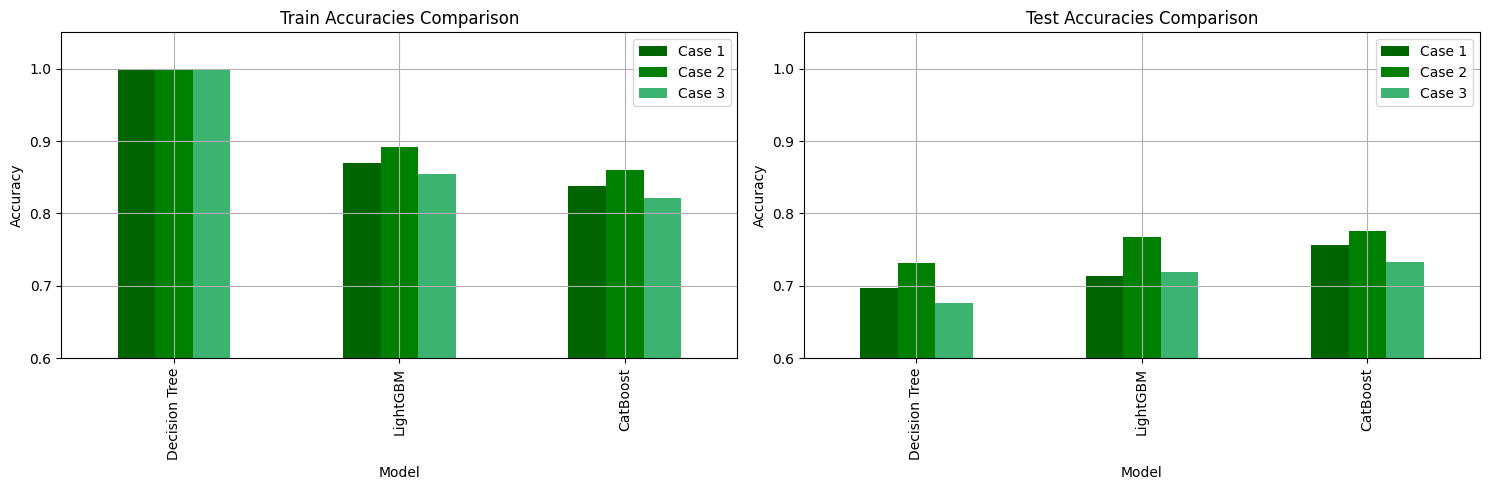

time: 733 ms (started: 2024-04-19 07:04:30 +00:00)


In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# Data extracted from the images for each case
case_1 = pd.DataFrame({
    'Model': ['Decision Tree', 'LightGBM', 'CatBoost'],
    'Train Accuracy': [1.00000, 0.869482, 0.837536],
    'Test Accuracy': [0.69700, 0.71429, 0.757143]
})

case_2 = pd.DataFrame({
    'Model': ['Decision Tree', 'LightGBM', 'CatBoost'],
    'Train Accuracy': [1.00000, 0.892375, 0.859750],
    'Test Accuracy': [0.732143, 0.767071, 0.775500]
})

case_3 = pd.DataFrame({
    'Model': ['Decision Tree', 'LightGBM', 'CatBoost'],
    'Train Accuracy': [1.00000, 0.854393, 0.821286],
    'Test Accuracy': [0.676643, 0.719857, 0.733500]
})

# Combining the cases for comparison
train_accuracies = pd.DataFrame({
    'Model': ['Decision Tree', 'LightGBM', 'CatBoost'],
    'Case 1': case_1['Train Accuracy'],
    'Case 2': case_2['Train Accuracy'],
    'Case 3': case_3['Train Accuracy']
})

test_accuracies = pd.DataFrame({
    'Model': ['Decision Tree', 'LightGBM', 'CatBoost'],
    'Case 1': case_1['Test Accuracy'],
    'Case 2': case_2['Test Accuracy'],
    'Case 3': case_3['Test Accuracy']
})

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Train Accuracies Comparison
train_accuracies.set_index('Model').plot(kind='bar', ax=axes[0], color=['darkgreen', 'green', 'mediumseagreen'], grid=True, linestyle='--')
axes[0].set_title('Train Accuracies Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0.6, 1.05)

# Test Accuracies Comparison
test_accuracies.set_index('Model').plot(kind='bar', ax=axes[1], color=['darkgreen', 'green', 'mediumseagreen'], grid=True, linestyle='--')
axes[1].set_title('Test Accuracies Comparison')
axes[1].set_ylabel('Accuracy')
axes[1].set_ylim(0.6, 1.05)

# Layout adjustments
plt.tight_layout()

# Show plot
plt.show()


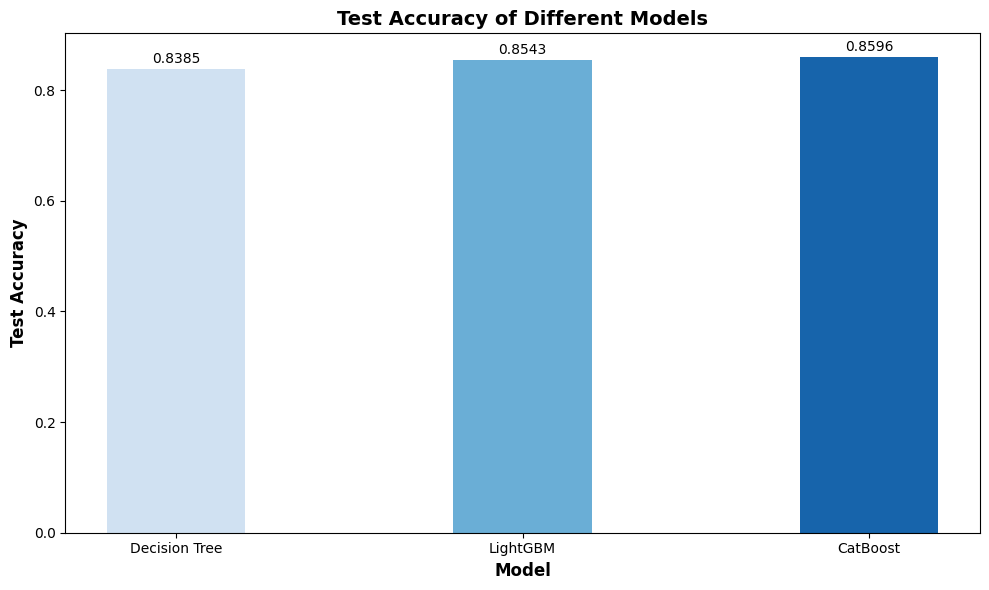

time: 220 ms (started: 2024-04-19 07:07:38 +00:00)


In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Decision Tree', 'LightGBM', 'CatBoost']
test_accuracy = [0.838459, 0.854340, 0.859586]

# Define colors as shades of blue
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(models)))

# Create bar plot with thin bars
plt.figure(figsize=(10, 6))
bars = plt.bar(models, test_accuracy, color=colors, width=0.4)  # Adjust width here

# Add labels and title
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Test Accuracy', fontsize=12, fontweight='bold')
plt.title('Test Accuracy of Different Models', fontsize=14, fontweight='bold')

# Add data labels on top of bars
for bar, acc in zip(bars, test_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{acc:.4f}', ha='center', va='bottom', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


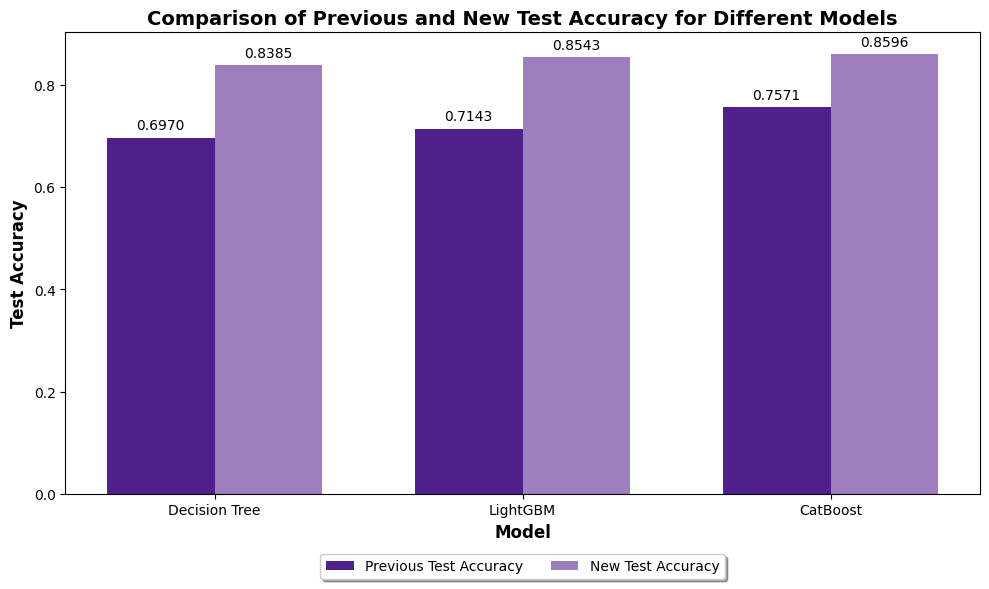

time: 282 ms (started: 2024-04-19 07:08:05 +00:00)


In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Decision Tree', 'LightGBM', 'CatBoost']
prev_accuracy = [0.69700, 0.71429, 0.757143]
new_accuracy = [0.838459, 0.854340, 0.859586]

# Define colors as shades of purple for previous and new accuracy
colors_prev = plt.cm.Purples(0.9)  # Darker shade of purple for previous accuracy
colors_new = plt.cm.Purples(1.5)   # Lighter shade of purple for new accuracy

# Create bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
bar_positions_prev = np.arange(len(models))
bar_positions_new = [pos + bar_width for pos in bar_positions_prev]

plt.bar(bar_positions_prev, prev_accuracy, color=colors_prev, width=bar_width, label='Previous Test Accuracy')
plt.bar(bar_positions_new, new_accuracy, color=colors_new, alpha=0.5, width=bar_width, label='New Test Accuracy')

# Add labels and title
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Test Accuracy', fontsize=12, fontweight='bold')
plt.title('Comparison of Previous and New Test Accuracy for Different Models', fontsize=14, fontweight='bold')
plt.xticks([pos + bar_width / 2 for pos in bar_positions_prev], models)

# Add data labels on top of bars
for pos, acc in zip(bar_positions_prev, prev_accuracy):
    plt.text(pos, acc + 0.01, f'{acc:.4f}', ha='center', va='bottom', fontsize=10)

for pos, acc in zip(bar_positions_new, new_accuracy):
    plt.text(pos, acc + 0.01, f'{acc:.4f}', ha='center', va='bottom', fontsize=10)

# Move legend to bottom and adjust layout
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=2)

# Show plot
plt.tight_layout()
plt.show()


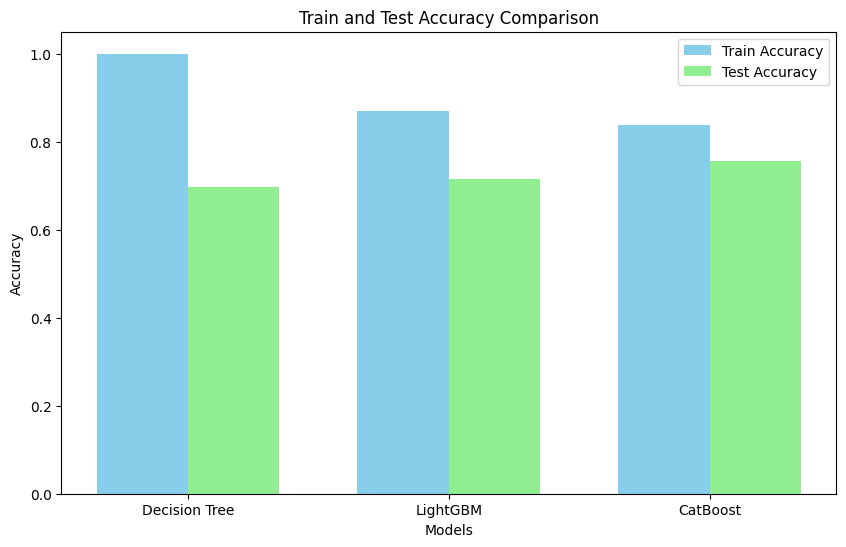

time: 233 ms (started: 2024-04-19 07:18:45 +00:00)


In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Decision Tree', 'LightGBM', 'CatBoost']
train_accuracy = [1.00000, 0.86948, 0.83736]
test_accuracy = [0.69700, 0.71429, 0.75714]

# Set the width of the bars
bar_width = 0.35

# Define the index for the models
index = np.arange(len(models))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
train_bars = ax.bar(index - bar_width/2, train_accuracy, bar_width, color='skyblue', label='Train Accuracy')
test_bars = ax.bar(index + bar_width/2, test_accuracy, bar_width, color='lightgreen', label='Test Accuracy')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Train and Test Accuracy Comparison')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.show()